In [1]:
import os, sys
cwd = os.getcwd()
project_path = cwd[:cwd.find('pygents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path)

import pandas as pd

from pygents.aigents_api import tokenize_re
from pygents.util import dictcount
from pygents.plot import plot_dict

In [2]:
df = pd.read_csv(r".\\notebooks\\nlp\\sentiment\\first dataset dominant and secondary distortions.csv")
df

,Patient Question,Distorted part,Dominant Distortion,Secondary Distortion (Optional)
0,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,Personalization,NaN
1,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,Labeling,Emotional Reasoning
2,So I’ve been dating on and off this guy for a...,NaN,No Distortion,NaN
3,My parents got divorced in 2004. My mother has...,NaN,No Distortion,NaN
4,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,Fortune-telling,Emotional Reasoning
...,...,...,...,...
2525,I’m a 21 year old female. I spent most of my l...,NaN,No Distortion,NaN
2526,I am 21 female and have not had any friends fo...,Now I am at university my peers around me all ...,Overgeneralization,NaN
2527,From the U.S.: My brother is 19 years old and ...,He claims he’s severely depressed and has outb...,Mental filter,Mind Reading
2528,From the U.S.: I am a 21 year old woman who ha...,NaN,No Distortion,NaN


In [3]:
# Analyzing the frequency of words (tokens) for each cognitive distortion

from collections import defaultdict

# Creating dictionaries for token counting
distortions_dicts = defaultdict(lambda: defaultdict(int))  # A separate dictionary is created for each distortion (distortion-token-token_frequency)
all_tokens_dict = defaultdict(int)  # A general dictionary of all tokens

# Manually define stop words (can be imported from the NLTK library)
stop_words = {".", ","}

# Loop through the rows of the DataFrame
for _, row in df.iterrows():
    # Text definition: first, check the 2nd column; if NaN, take the text from the 1st column.
    text = row[1] if pd.notna(row[1]) else row[0]
    primary_distortion = row[2]  # The main cognitive distortion from the 3rd column
    secondary_distortion = row[3] if pd.notna(row[3]) else None  # The secondary distortion from the 4th column, if it exists

    # Text tokenization
    tokens = tokenize_re(text)

    # Remove stop words
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    dictcount(all_tokens_dict, filtered_tokens)  # Increment the counter in the general dictionary
    dictcount(distortions_dicts[primary_distortion], filtered_tokens)  # Increment the counter for the corresponding primary distortion
    if secondary_distortion:
        dictcount(distortions_dicts[secondary_distortion], filtered_tokens) # Increment the counter for the corresponding secondary distortion (if present)


print("General dictionary of tokens:")
print(dict(all_tokens_dict))

print("\nDictionaries of tokens by distortions:")
for distortion, tokens_dict in distortions_dicts.items():
    print(f"Distortion '{distortion}':")
    print(dict(tokens_dict))



C:\Users\kzvau\AppData\Local\Temp\ipykernel_18276\1487489303.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = row[1] if pd.notna(row[1]) else row[0]
C:\Users\kzvau\AppData\Local\Temp\ipykernel_18276\1487489303.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  primary_distortion = row[2]  # The main cognitive distortion from the 3rd column
C:\Users\kzvau\AppData\Local\Temp\ipykernel_18276\1487489303.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by

AttributeError: module 'emoji' has no attribute 'UNICODE_EMOJI'

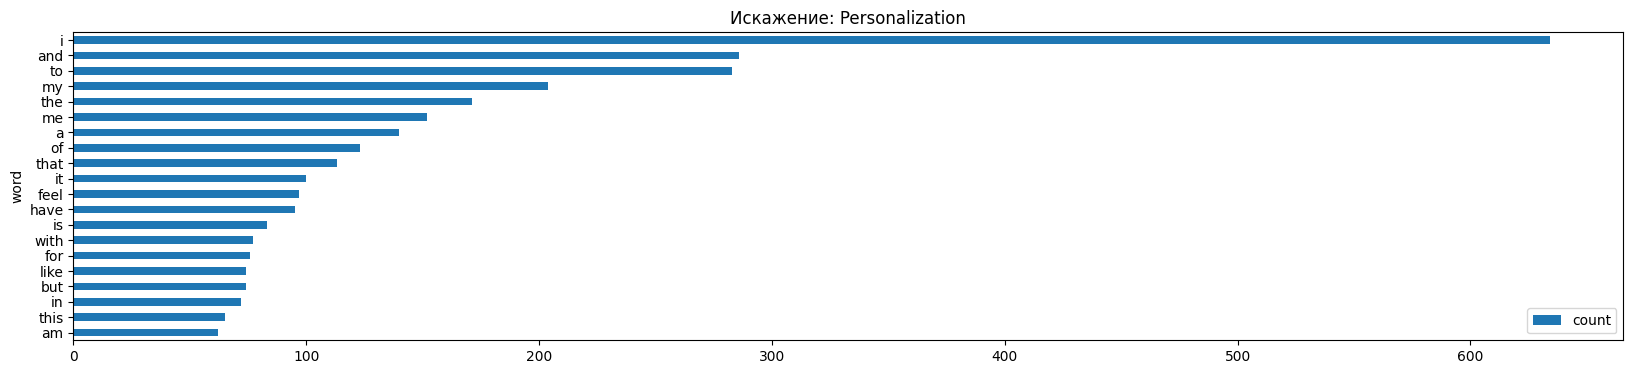

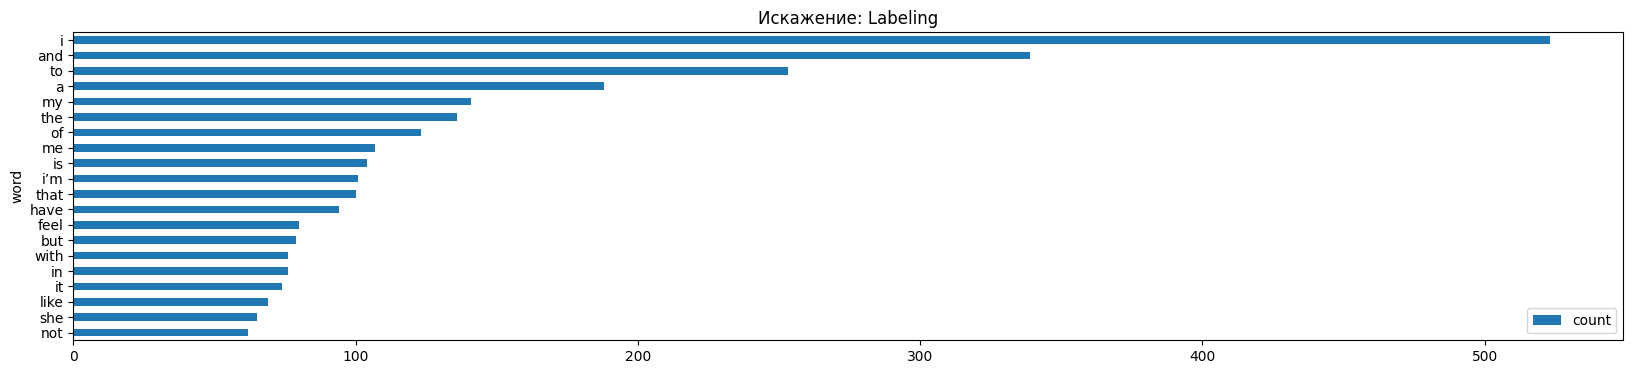

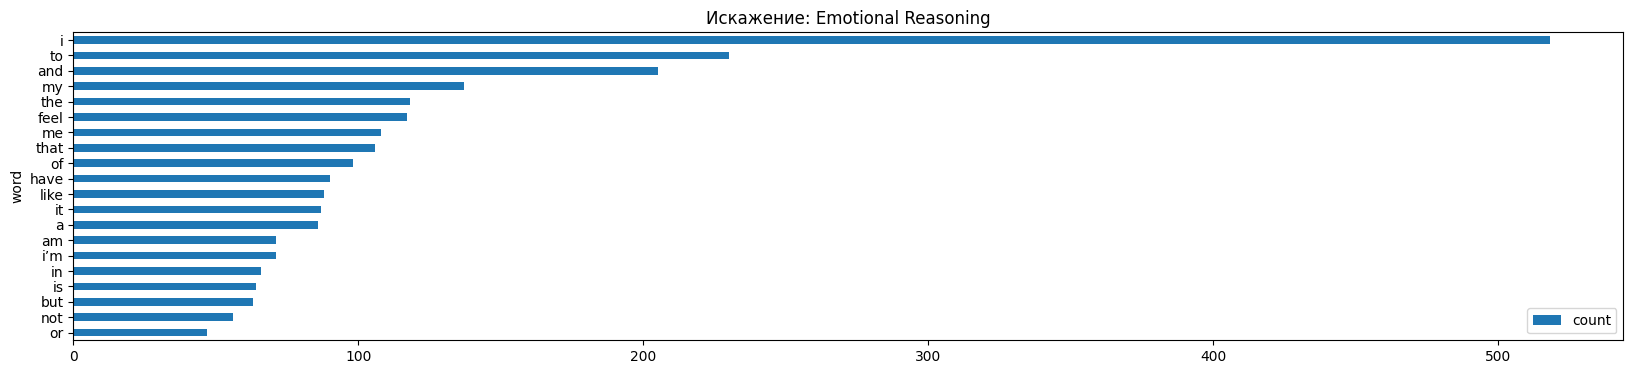

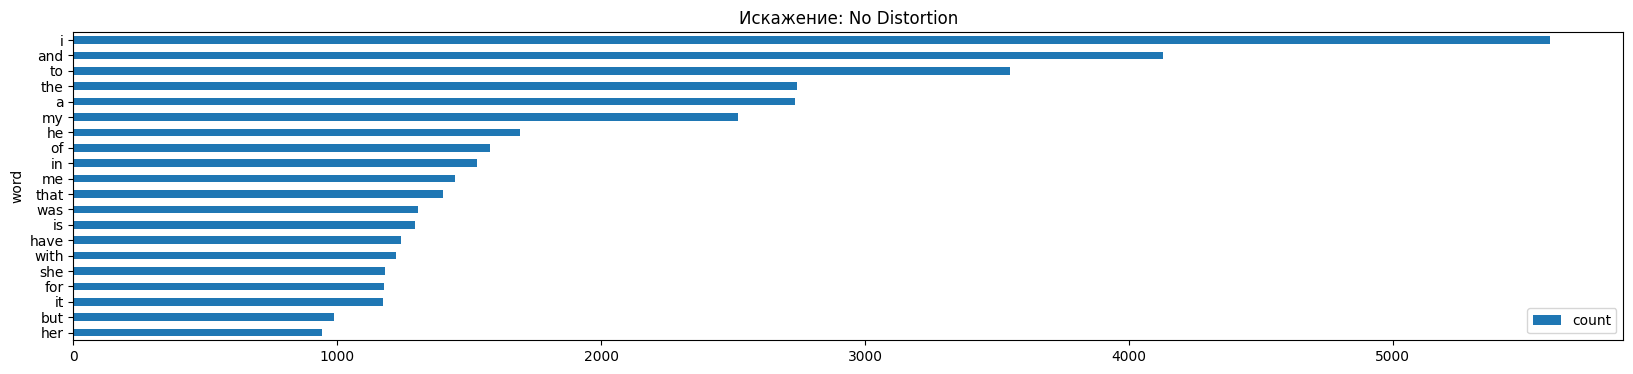

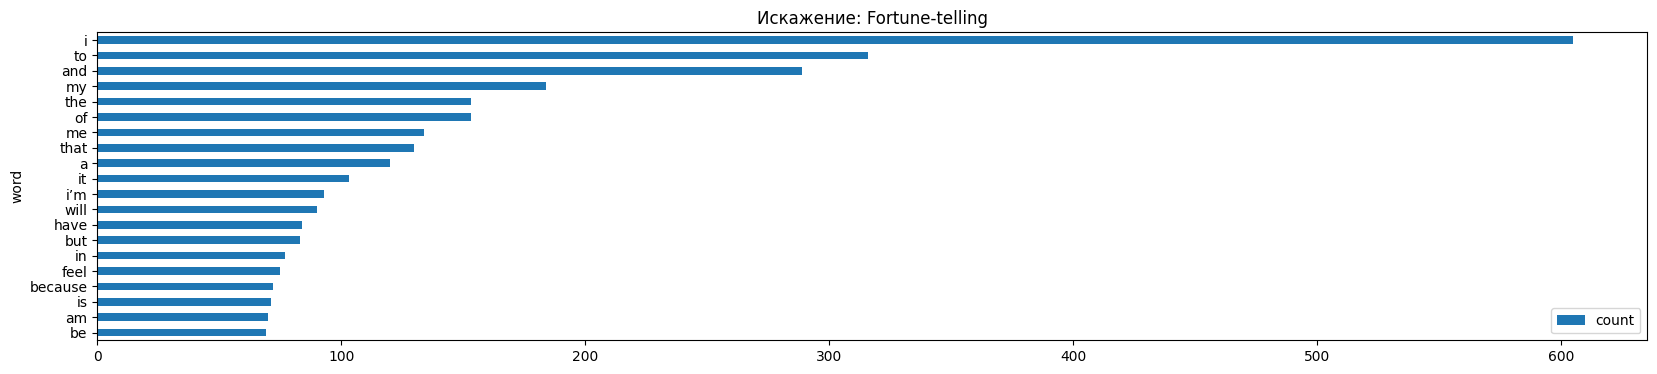

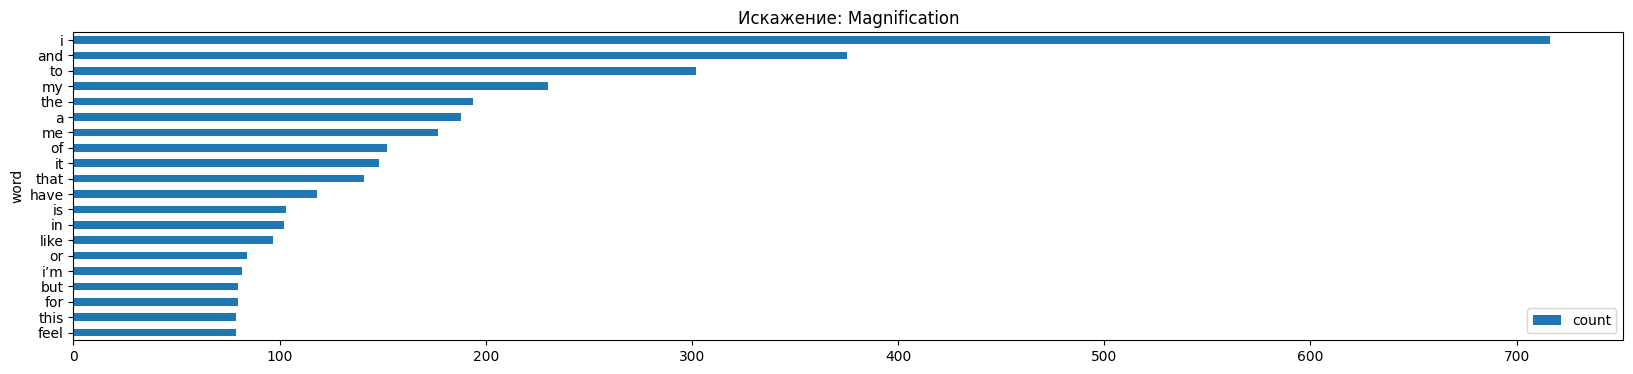

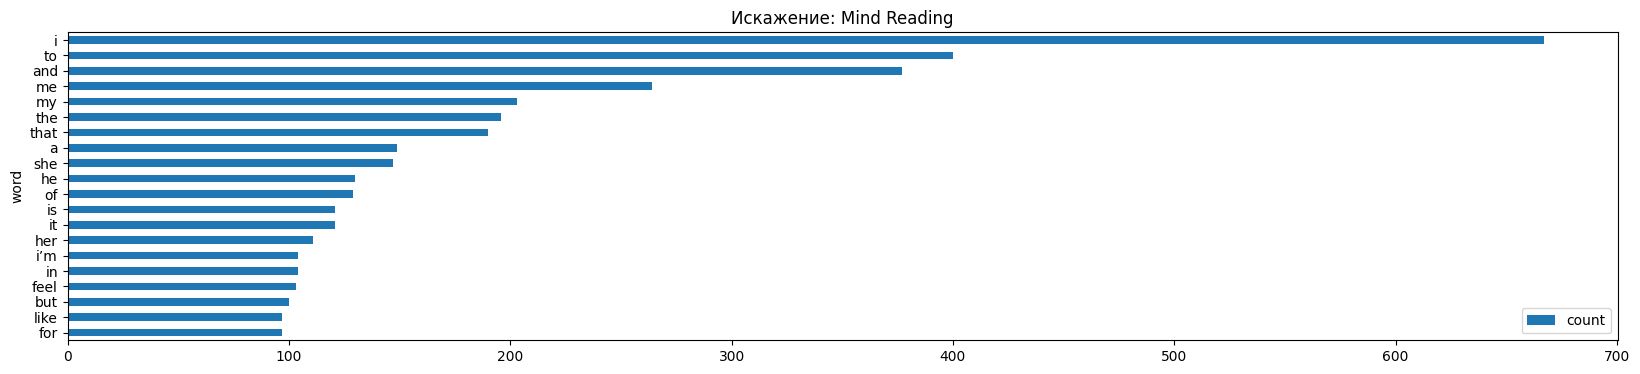

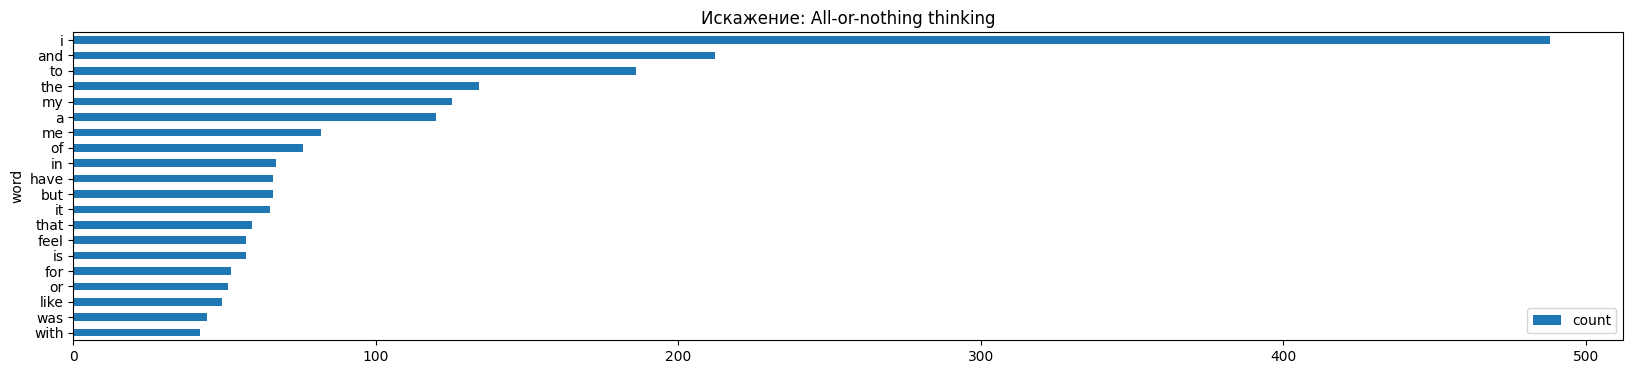

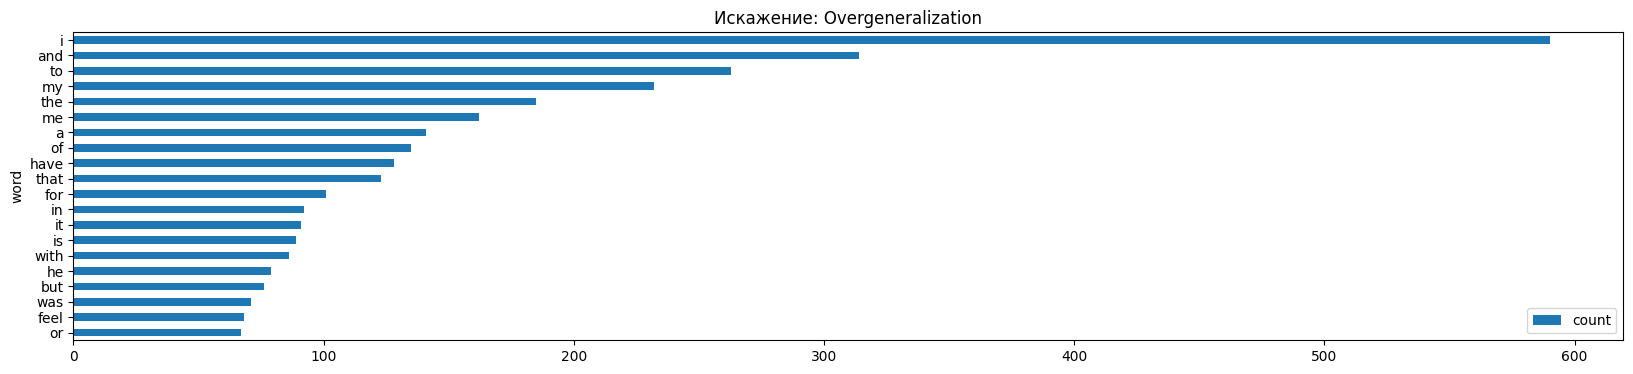

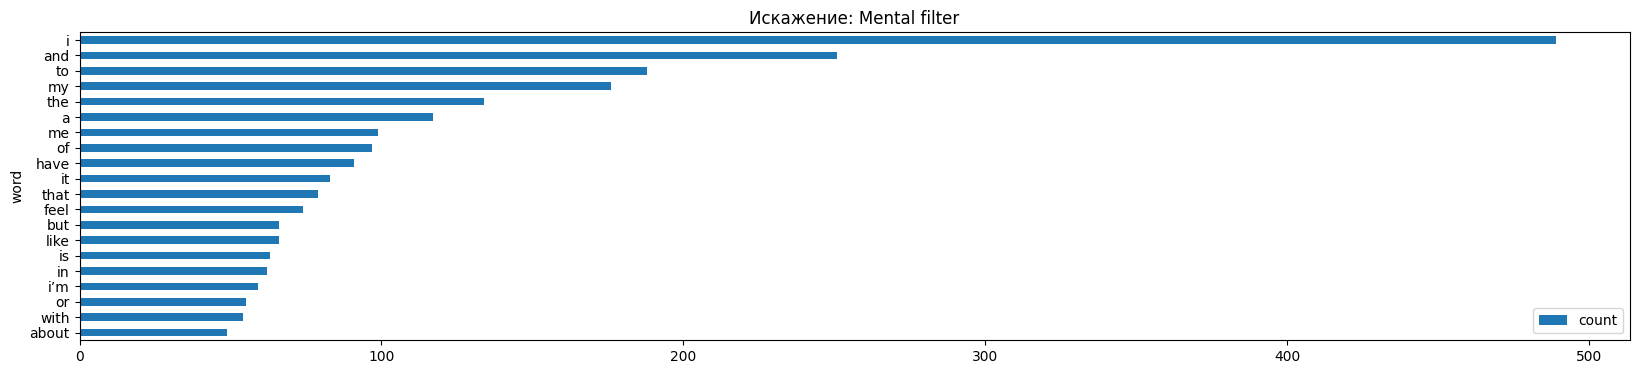

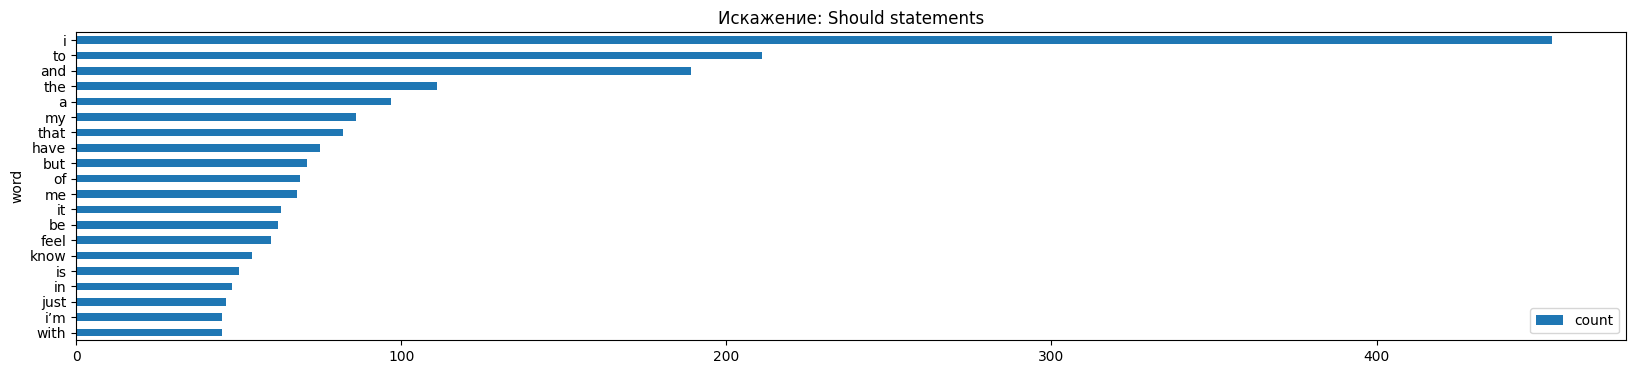

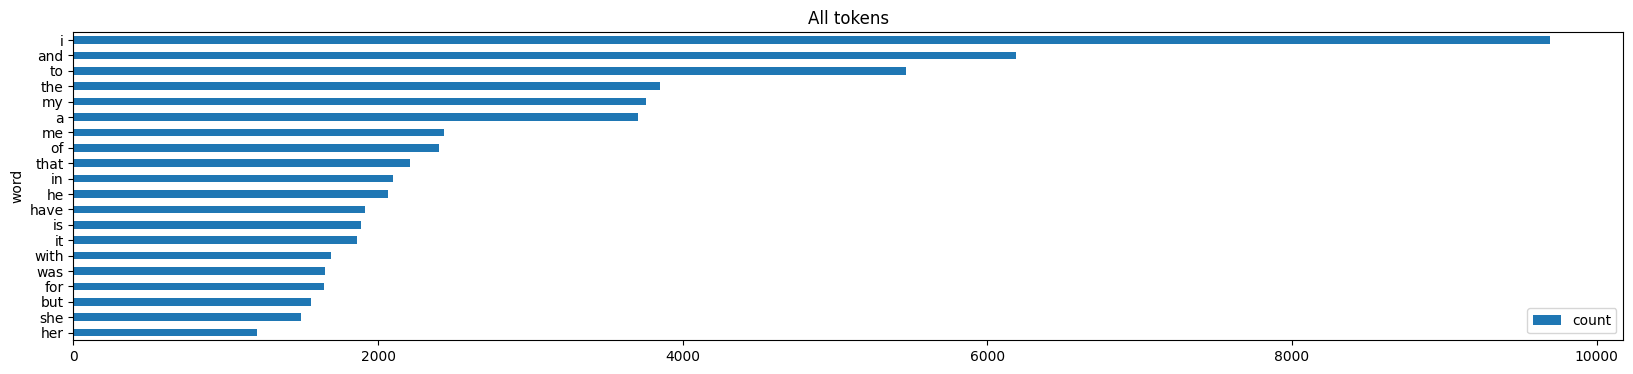

In [4]:
# Displaying the results of word (token) frequency for each cognitive distortion

# Display graphs for each distortion
for distortion, tokens_dict in distortions_dicts.items():
    plot_dict(
        tokens_dict,
        labels="word",
        values="count",
        title=f"Искажение: {distortion}",
        head=20             # Top 20 words
    )


# Display a general graph for all tokens
plot_dict(
    all_tokens_dict,
    labels="word",
    values="count",
    title="All tokens",
    head=20                # Top 20 words
)

In [5]:
# Analyze TF-IDF values for tokens for each cognitive distortion

import math

# Creating dictionaries for counting tokens
distortions_dicts = defaultdict(lambda: defaultdict(int))  # A separate dictionary is created for each distortion (distortion-token-token_frequency)
all_tokens_dict = defaultdict(int)  # A general dictionary of all tokens
doc_counts = defaultdict(int)  # The number of documents (texts) in which each word appears

# Loop through the rows of the DataFrame
for _, row in df.iterrows():
    # Text identification: first, check the 2nd column; if NaN, take the text from the 1st column
    text = row[1] if pd.notna(row[1]) else row[0]
    primary_distortion = row[2]  # The primary cognitive distortion from the 3rd column
    secondary_distortion = row[3] if pd.notna(row[3]) else None  # The secondary distortion from the 4th column, if present

    # Text tokenization
    tokens = tokenize_re(text)

    # Update the document counter for tokens based on the identified tokens
    unique_tokens = set(tokens)
    for token in unique_tokens:
        doc_counts[token] += 1

    # Token counting
    dictcount(all_tokens_dict, tokens)  # Increment the counter in the general dictionary
    dictcount(distortions_dicts[primary_distortion], tokens)  # Increment the counter for the corresponding primary distortion
    if secondary_distortion:
        dictcount(distortions_dicts[secondary_distortion], tokens) # Increment the counter for the corresponding secondary distortion (if present)

# The total number of texts
total_docs = len(df)

# TF-IDF Calculation
tfidf_dicts = defaultdict(dict)
for distortion, tokens_dict in distortions_dicts.items(): # For each distortion (distortion), analyze the tokens (tokens_dict)
    for token, count in tokens_dict.items(): # For each token (token), check the frequency of occurrence (count) for the given distortion.
        tf = count / sum(tokens_dict.values())  # Word frequency in the text (TF): TF = (Number of occurrences of the given word for the specific cognitive distortion) / (Total number of occurrences of all other words for the same cognitive distortion) 
        idf = math.log(total_docs / (1 + doc_counts[token]))  # Inverse Document Frequency (IDF)
        tfidf_dicts[distortion][token] = tf * idf  # TF-IDF


print("TF-IDF by distortions:")
for distortion, tokens_tfidf in tfidf_dicts.items():
    print(f"\nDistortion '{distortion}':")
    sorted_tfidf = sorted(tokens_tfidf.items(), key=lambda x: x[1], reverse=True)
    for token, tfidf in sorted_tfidf[:10]:  # Display the top 10 words
        print(f"  {token}: {tfidf:.4f}")


C:\Users\kzvau\AppData\Local\Temp\ipykernel_22768\2611031147.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = row[1] if pd.notna(row[1]) else row[0]
C:\Users\kzvau\AppData\Local\Temp\ipykernel_22768\2611031147.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  primary_distortion = row[2]  # Основное когнитивное искажение из 3-го столбца
C:\Users\kzvau\AppData\Local\Temp\ipykernel_22768\2611031147.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by po

'\nprint("TF-IDF по искажениям:")\nfor distortion, tokens_tfidf in tfidf_dicts.items():\n    print(f"\nИскажение \'{distortion}\':")\n    sorted_tfidf = sorted(tokens_tfidf.items(), key=lambda x: x[1], reverse=True)\n    for token, tfidf in sorted_tfidf[:10]:  # Показываем топ-10 слов\n        print(f"  {token}: {tfidf:.4f}")\n'

C:\Users\kzvau\AppData\Local\Temp\ipykernel_22768\3390385582.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = row[1] if pd.notna(row[1]) else row[0]
C:\Users\kzvau\AppData\Local\Temp\ipykernel_22768\3390385582.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  primary_distortion = row[2]  # Основное когнитивное искажение из 3-го столбца
C:\Users\kzvau\AppData\Local\Temp\ipykernel_22768\3390385582.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by po

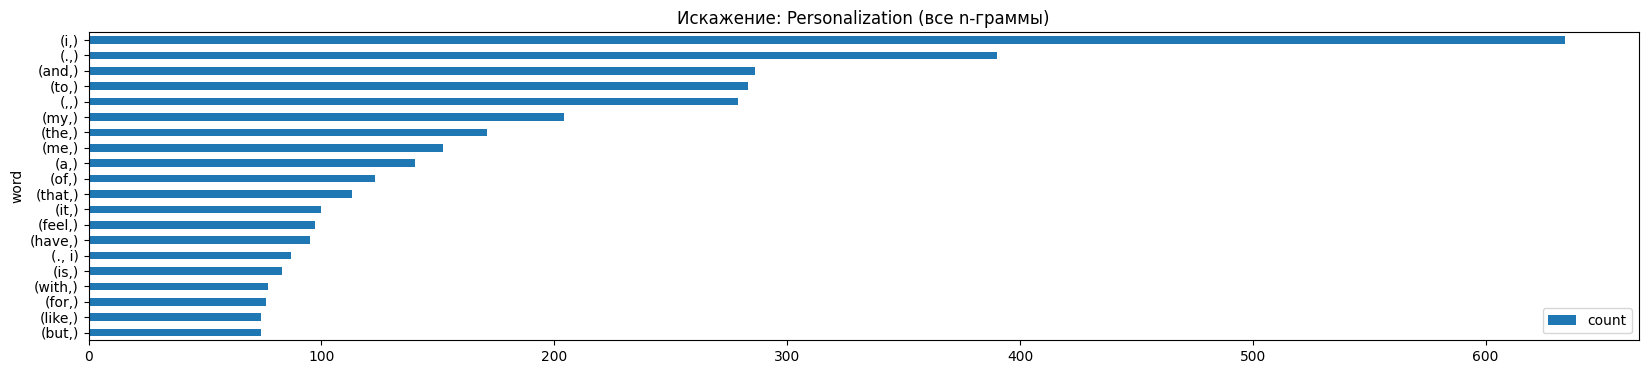

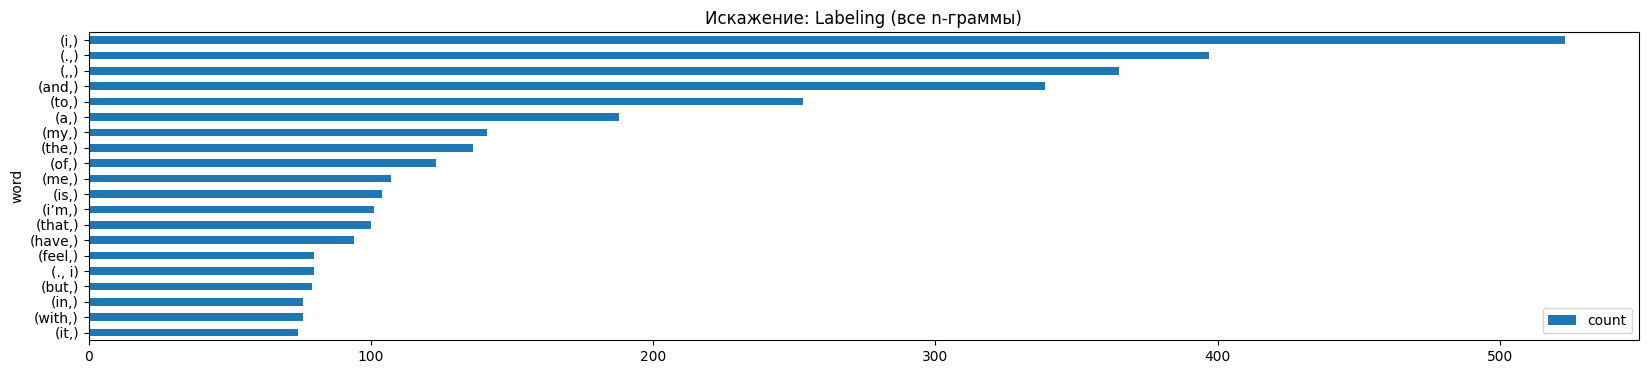

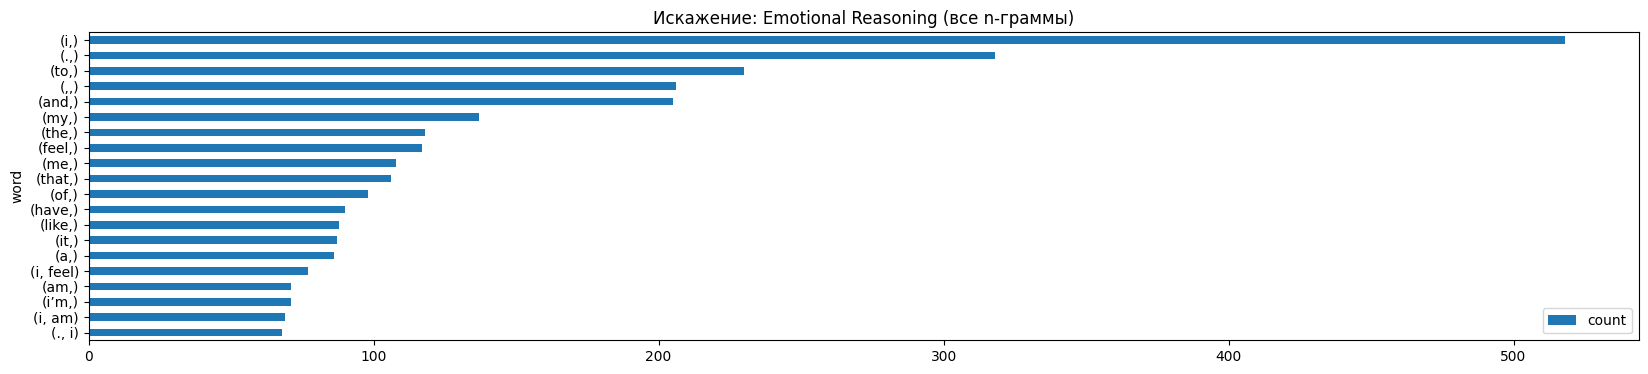

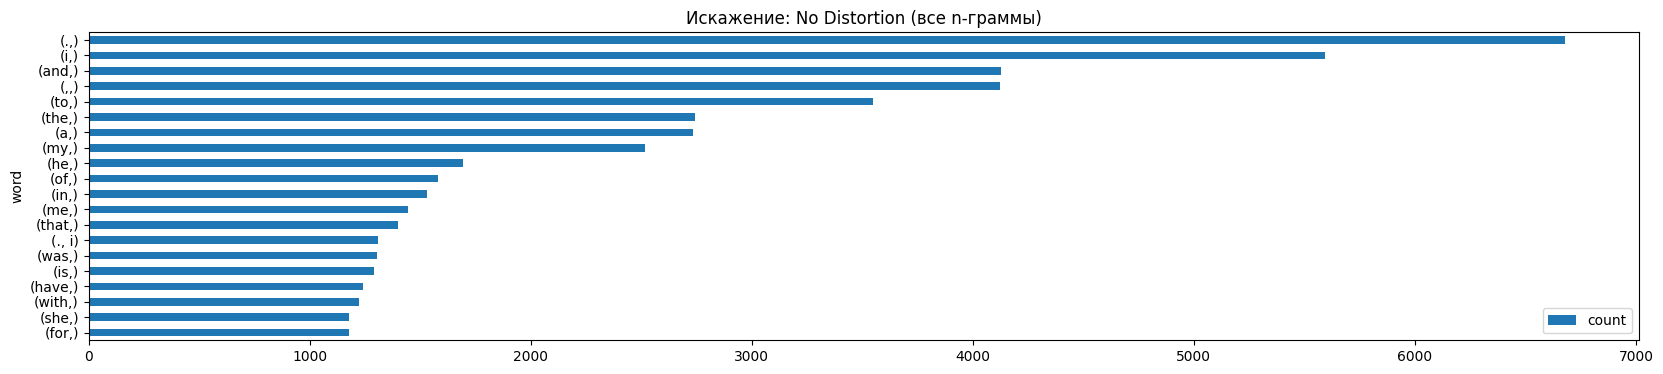

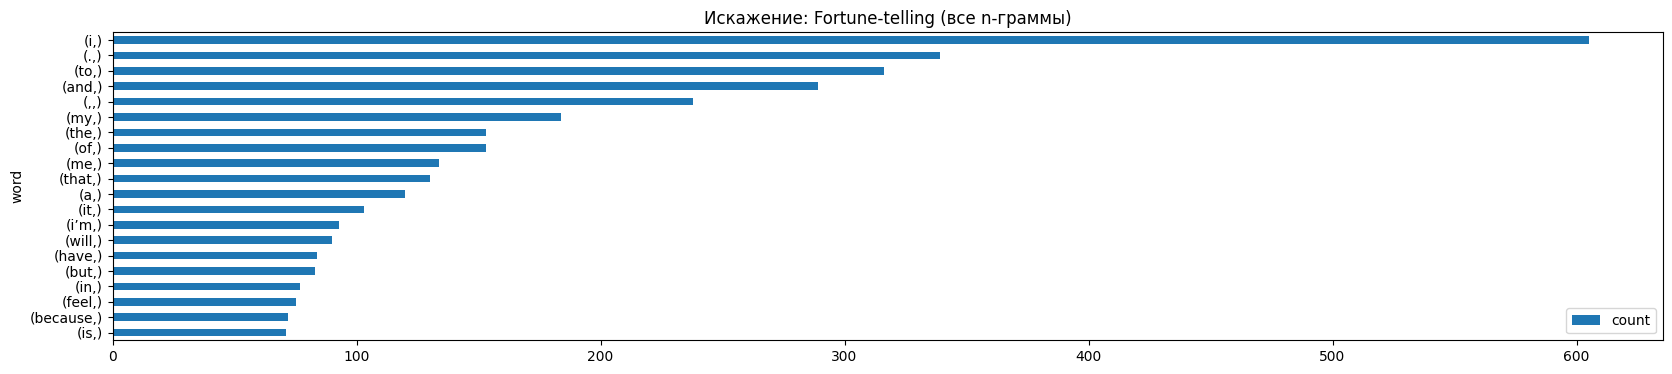

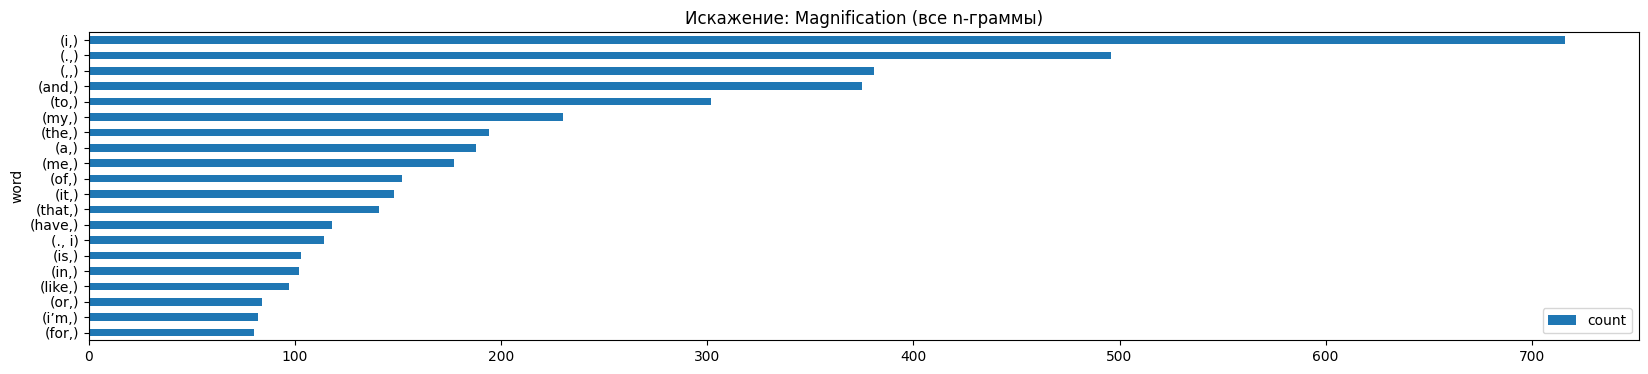

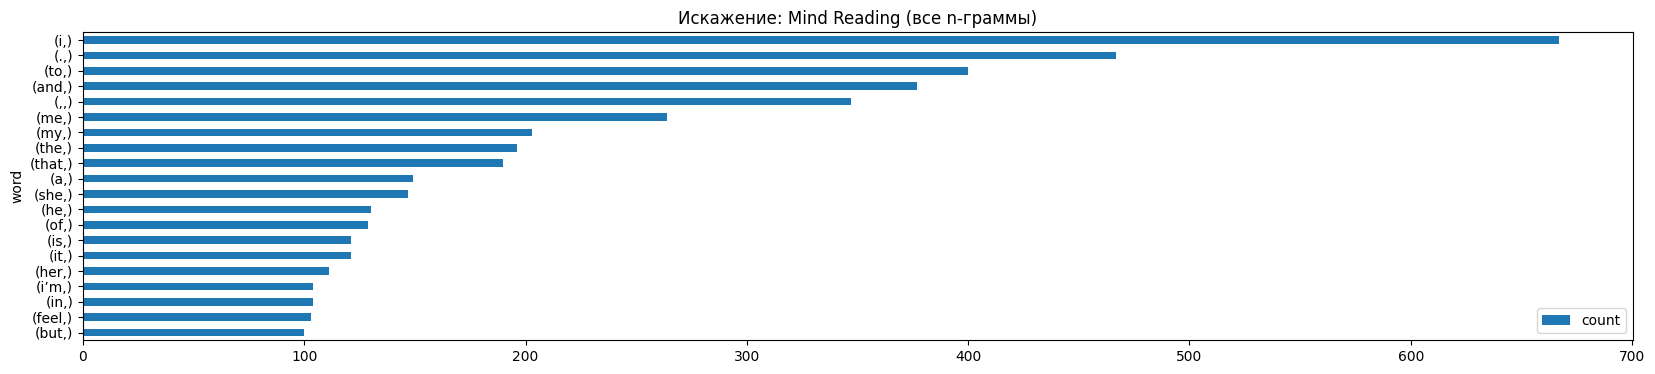

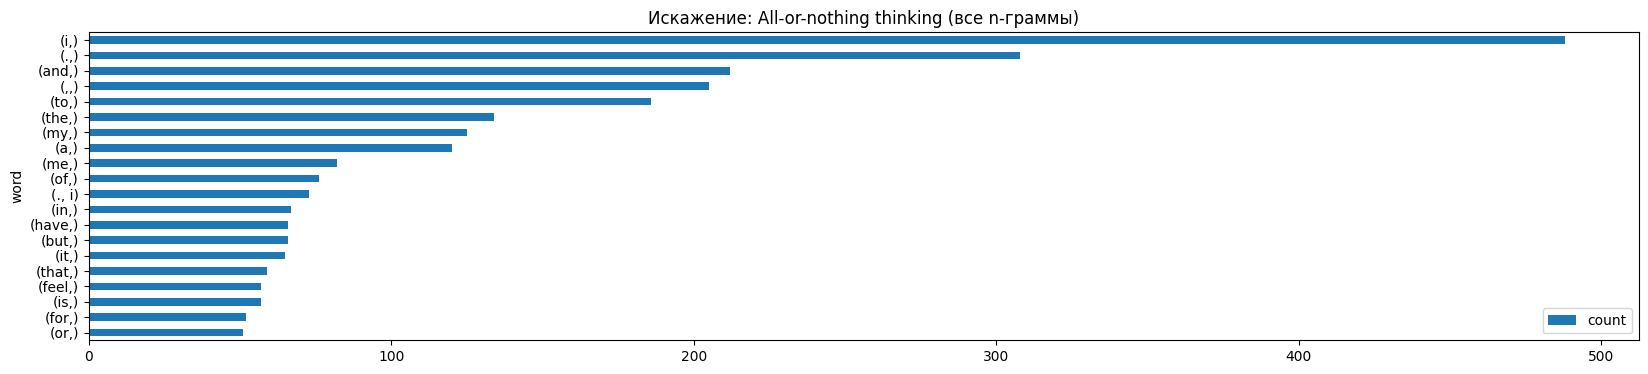

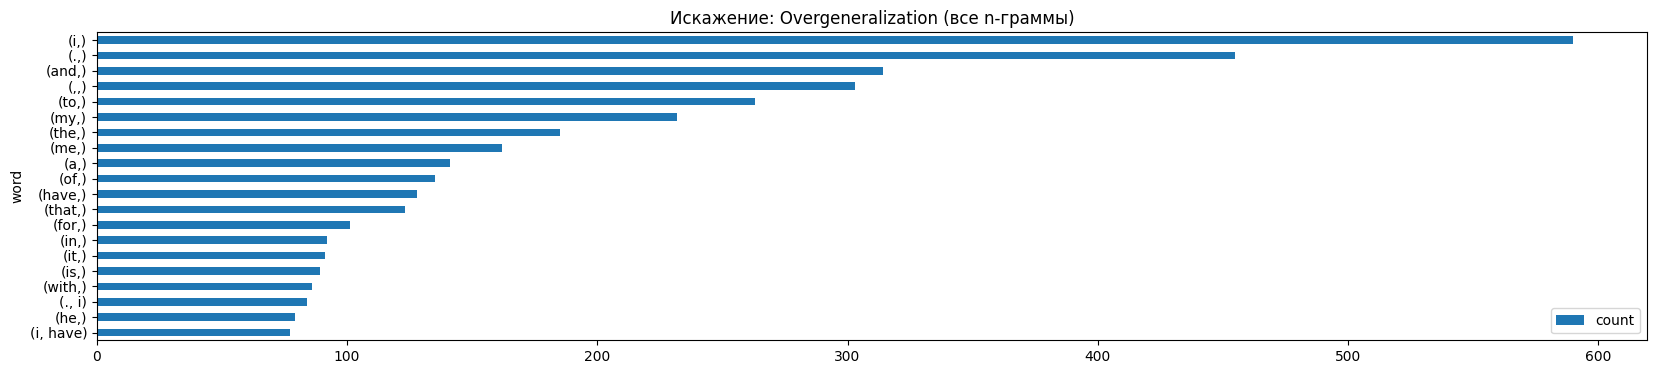

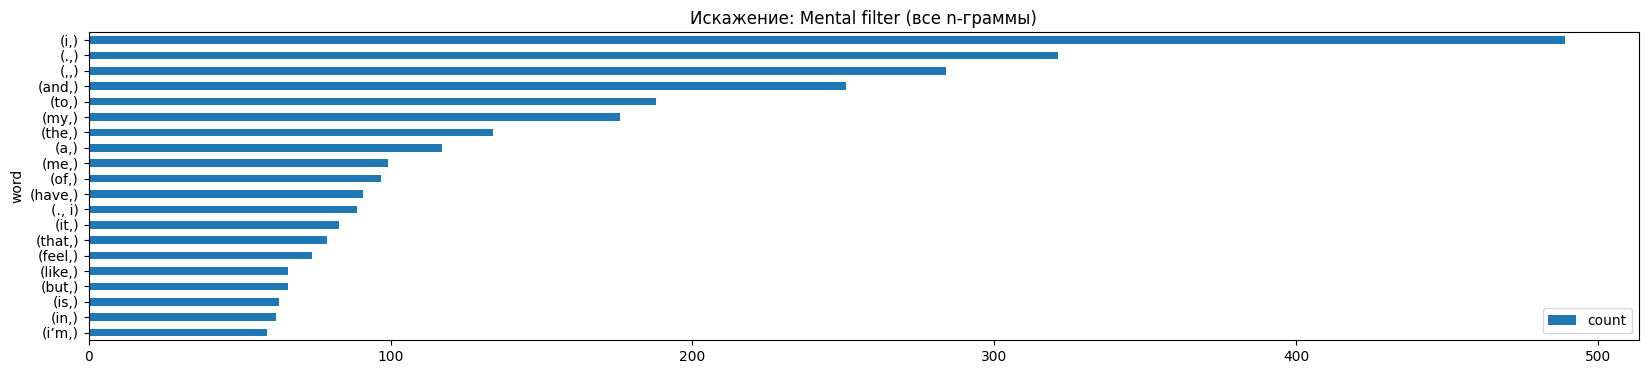

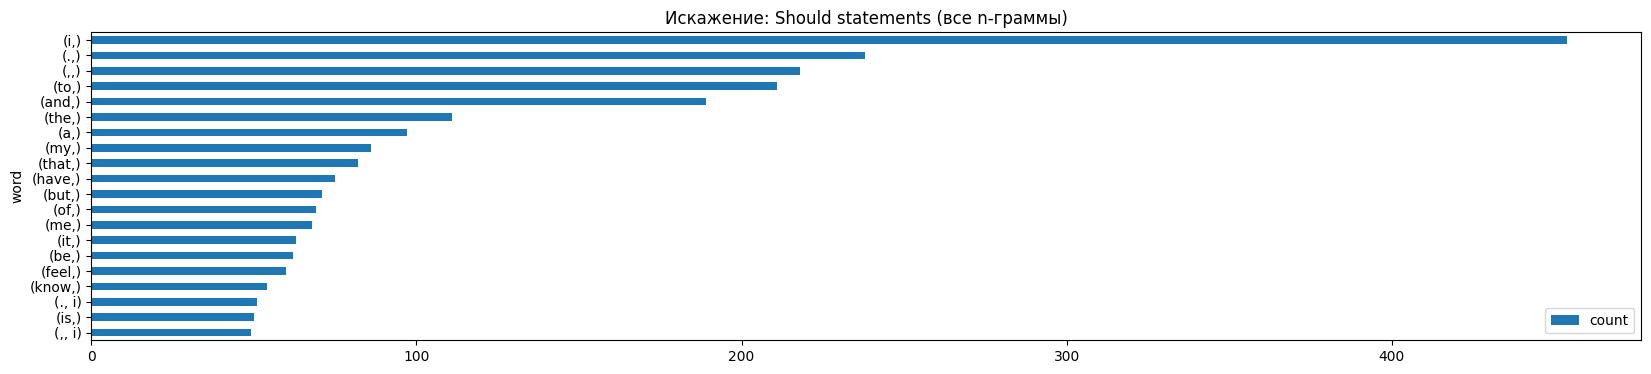

In [6]:
# Analyze the frequency of n-grams for each cognitive distortion

from pygents.aigents_api import build_ngrams

# Creating dictionaries for counting n-grams
n_gram_dicts = defaultdict(lambda: defaultdict(int))  # A dictionary for each distortion (distortion-n-gram-n_gram_frequency)
all_n_grams = defaultdict(int)  # A general dictionary for all n-grams

# Loop through the rows of the DataFrame
for _, row in df.iterrows():
    # Text identification: first, check the 2nd column; if NaN, take the text from the 1st column
    text = row[1] if pd.notna(row[1]) else row[0]
    primary_distortion = row[2]  # The primary cognitive distortion from the 3rd column
    secondary_distortion = row[3] if pd.notna(row[3]) else None  # The secondary distortion from the 4th column, if present

    # Text tokenization
    tokens = tokenize_re(text)

    # Generation and counting of n-grams (from 1 to 4)
    for n in range(1, 5):
        n_grams = build_ngrams(tokens, n)
        dictcount(all_n_grams, n_grams)
        dictcount(n_gram_dicts[primary_distortion], n_grams)  # Increment the counter for the corresponding primary distortion
        if secondary_distortion:
            dictcount(n_gram_dicts[secondary_distortion], n_grams) # Increment the counter for the corresponding secondary distortion (if present)

# Display graphs for each distortion
for distortion, ngram_dict in n_gram_dicts.items():
    plot_dict(
        ngram_dict,
        labels="word",
        values="count",
        title=f"Distortion: {distortion}",
        head=20             # Top 20 n-grams
    )


C:\Users\kzvau\AppData\Local\Temp\ipykernel_22768\746845370.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = row[1] if pd.notna(row[1]) else row[0]
C:\Users\kzvau\AppData\Local\Temp\ipykernel_22768\746845370.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  primary_distortion = row[2]  # Основное когнитивное искажение из 3-го столбца
C:\Users\kzvau\AppData\Local\Temp\ipykernel_22768\746845370.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posit

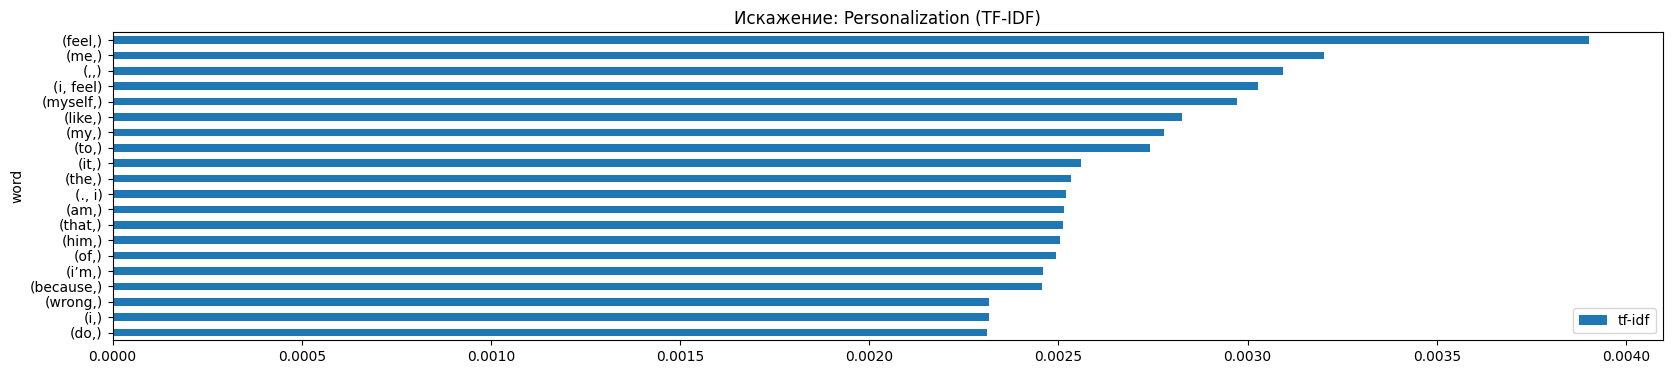

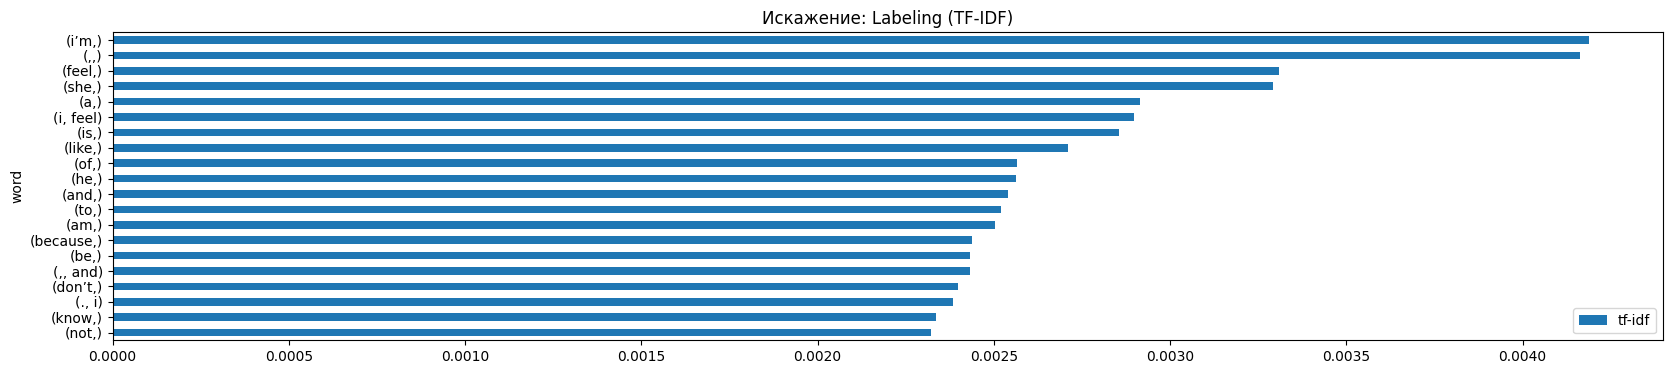

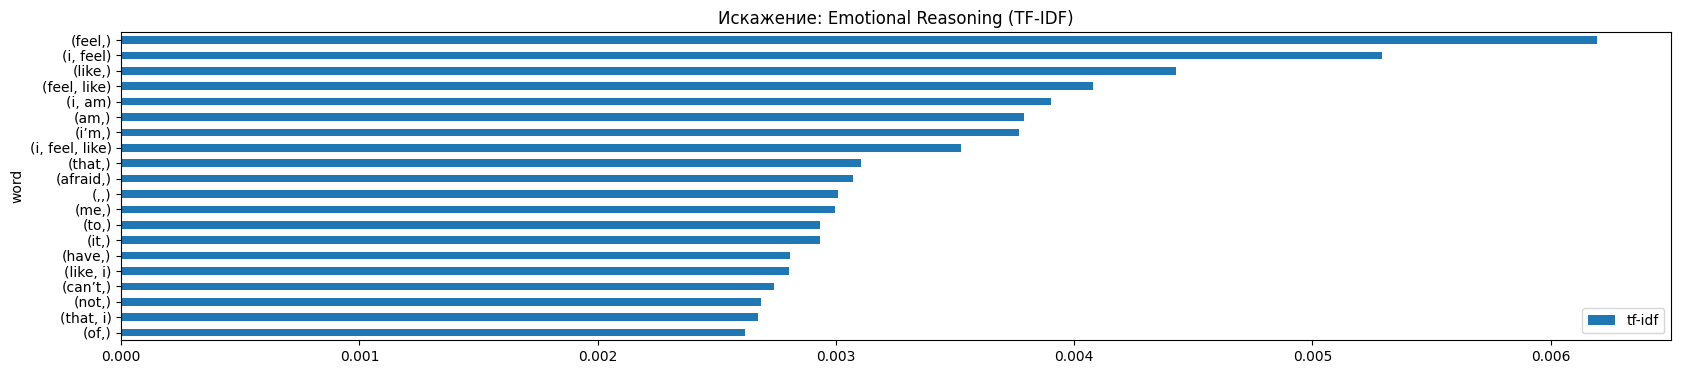

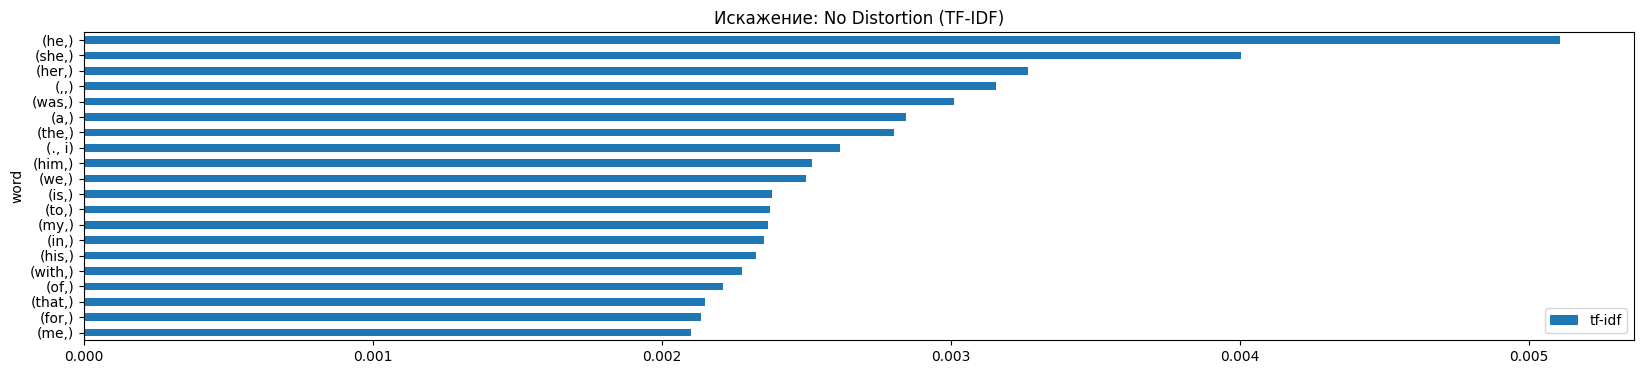

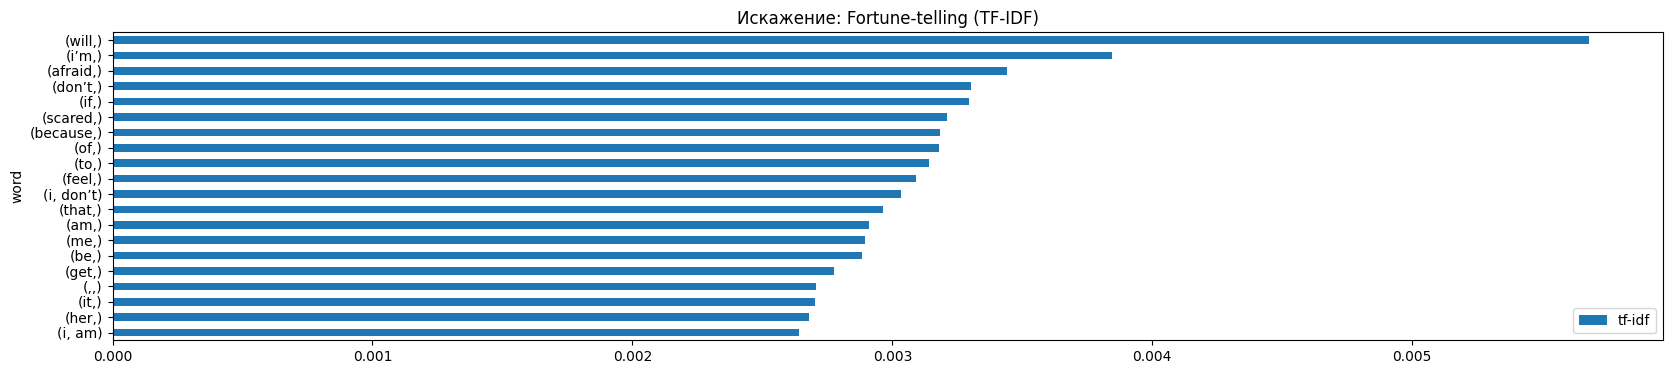

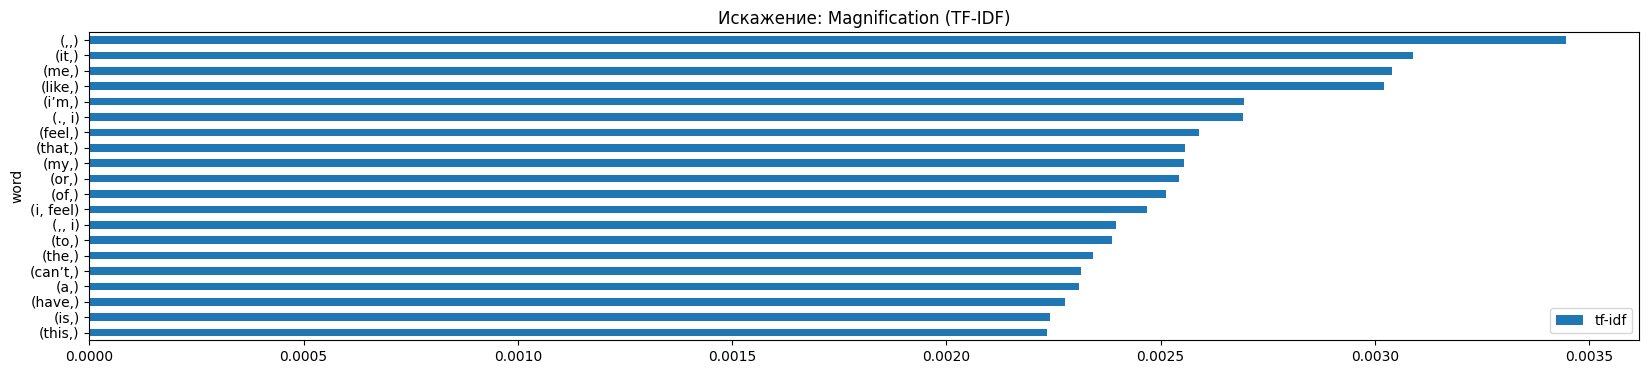

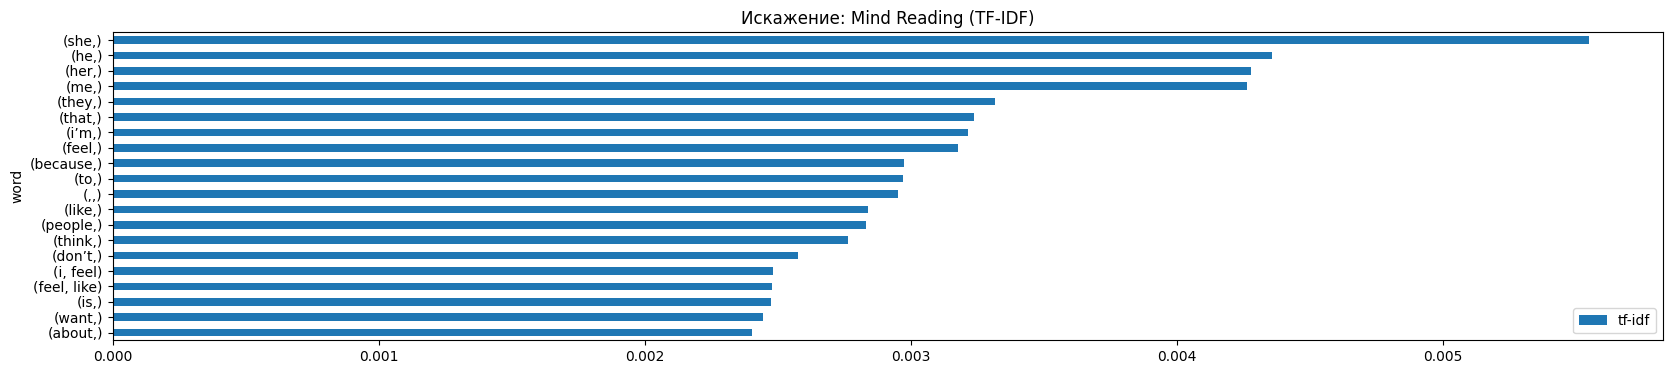

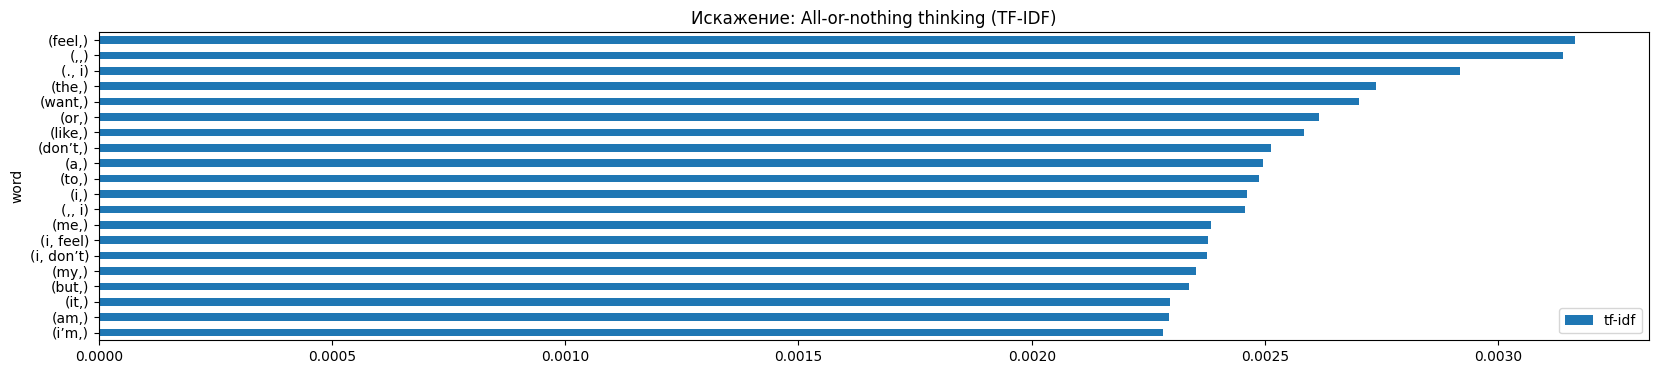

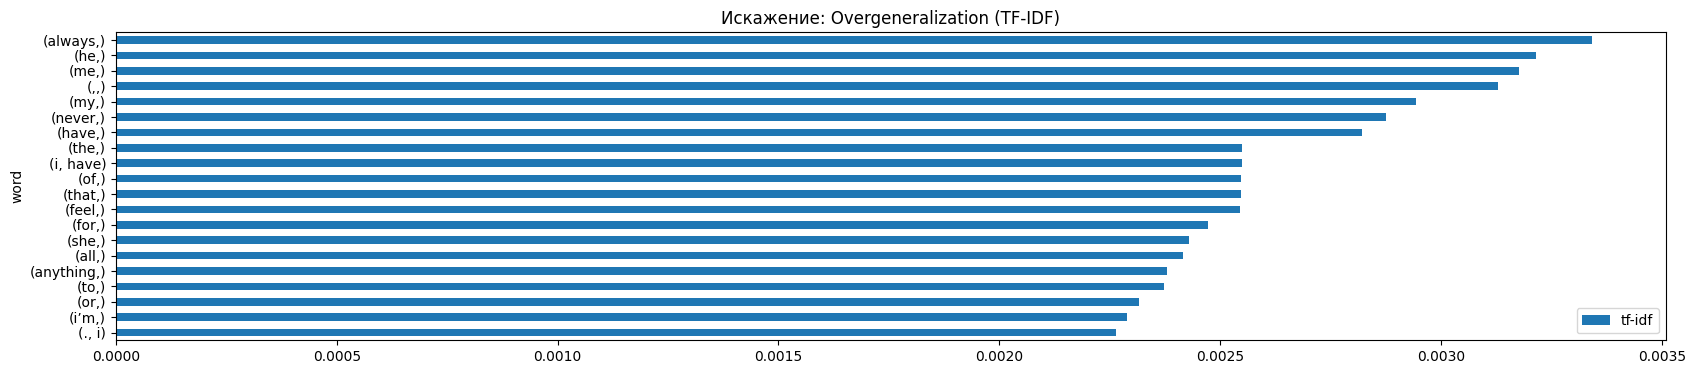

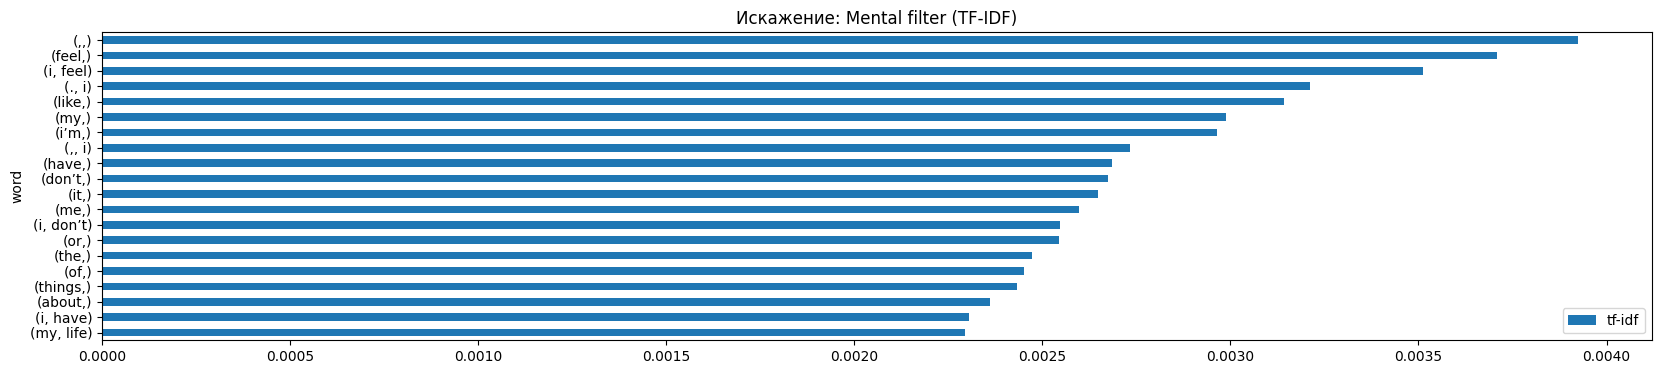

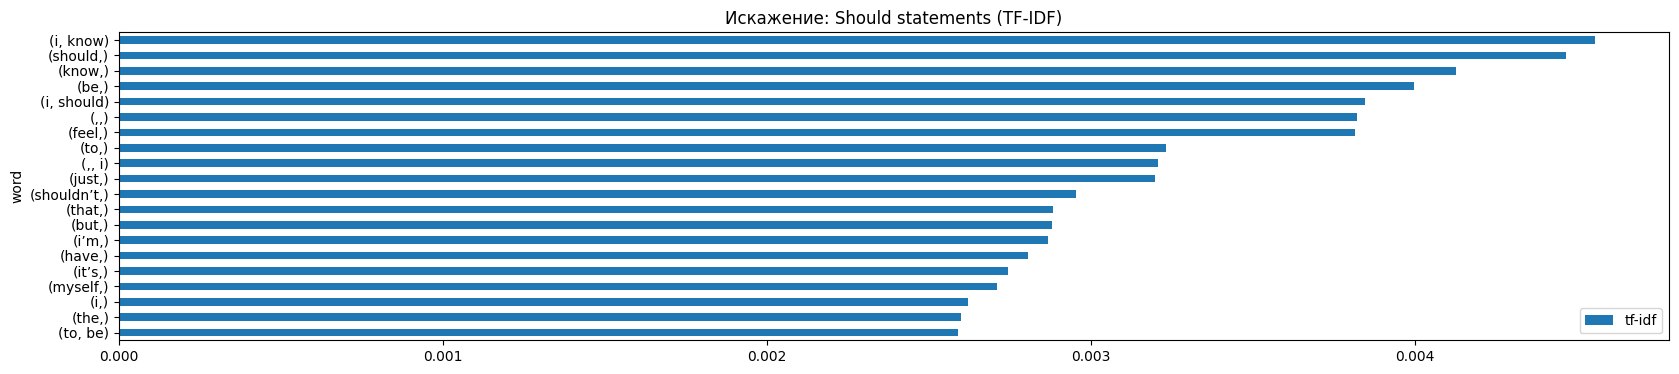

In [7]:
# Analyze TF-IDF values for n-grams for each cognitive distortion

# Creating dictionaries for counting n-grams
n_gram_dicts = defaultdict(lambda: defaultdict(int))  # A dictionary for each distortion (distortion-n-gram-n_gram_frequency)
all_n_grams = defaultdict(int)  # A general dictionary for all n-grams
doc_counts = defaultdict(int)  # The number of documents in which each n-gram appears


# Loop through the rows of the DataFrame
for _, row in df.iterrows():
    # Text identification: first, check the 2nd column; if NaN, take the text from the 1st column
    text = row[1] if pd.notna(row[1]) else row[0]
    primary_distortion = row[2]  # The primary cognitive distortion from the 3rd column
    secondary_distortion = row[3] if pd.notna(row[3]) else None  # The secondary distortion from the 4th column, if present

    # Text tokenization
    tokens = tokenize_re(text)

    # Generate n-grams and update the document counters where they appear
    unique_ngrams = set()
    for n in range(1, 5):
        n_grams = build_ngrams(tokens, n)
        unique_ngrams.update(n_grams)
        dictcount(all_n_grams, n_grams)
        dictcount(n_gram_dicts[primary_distortion], n_grams)  # Increment the counter for the corresponding primary distortion
        if secondary_distortion:
            dictcount(n_gram_dicts[secondary_distortion], n_grams) # Increment the counter for the corresponding secondary distortion (if present)

    for n_gram in unique_ngrams:
        doc_counts[n_gram] += 1

# The total number of texts
total_docs = len(df)

# TF-IDF Calculation
tfidf_dicts = defaultdict(dict)
for distortion, ngram_dict in n_gram_dicts.items(): # For each distortion (distortion), analyze the n-grams (ngram_dict)
    for n_gram, count in ngram_dict.items(): # For each n-gram (n_gram), check its frequency of occurrence (count) for the given distortion
        tf = count / sum(ngram_dict.values())  # Frequency of the n-gram in the text (TF): TF = (Number of occurrences of the given n-gram for the specific cognitive distortion) / (Total number of occurrences of all other n-grams for the same cognitive distortion)
        idf = math.log(total_docs / (1 + doc_counts[n_gram]))  # Inverse Document Frequency (IDF): IDF = Total number of documents / Number of documents containing the given n-gram
        tfidf_dicts[distortion][n_gram] = tf * idf  # TF-IDF

# Display graphs for each distortion considering TF-IDF values
for distortion, tfidf in tfidf_dicts.items():
    plot_dict(
        tfidf,
        labels="word",
        values="tf-idf",
        title=f"Distortion: {distortion} (TF-IDF)",
        head=20             # Top 20 n-grams by TF-IDF
    )


C:\Users\kzvau\AppData\Local\Temp\ipykernel_22768\605171585.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = row[1] if pd.notna(row[1]) else row[0]
C:\Users\kzvau\AppData\Local\Temp\ipykernel_22768\605171585.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  primary_distortion = row[2]  # Основное когнитивное искажение из 3-го столбца
C:\Users\kzvau\AppData\Local\Temp\ipykernel_22768\605171585.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posit

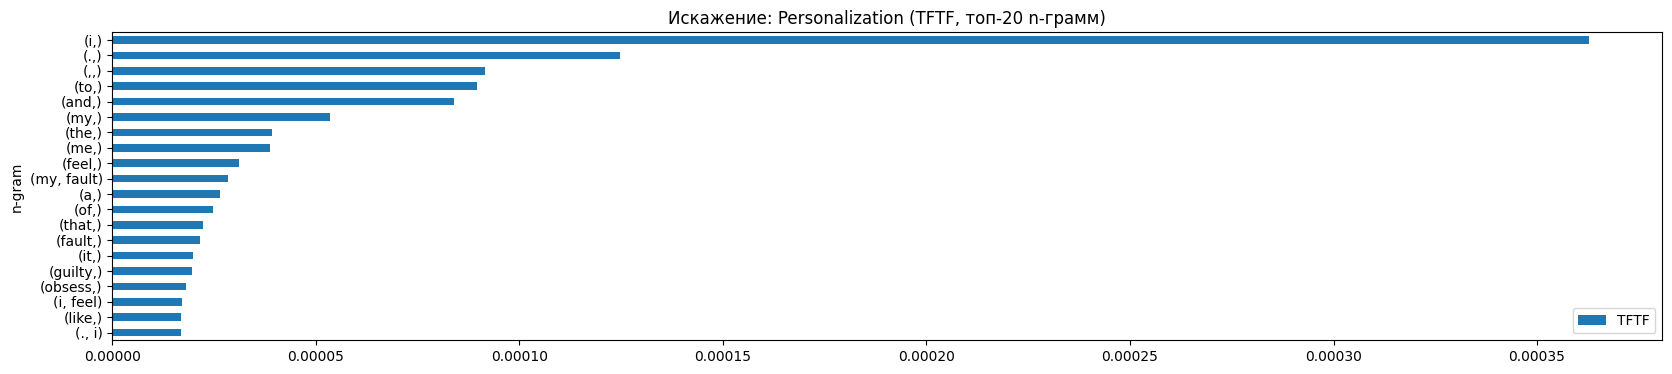

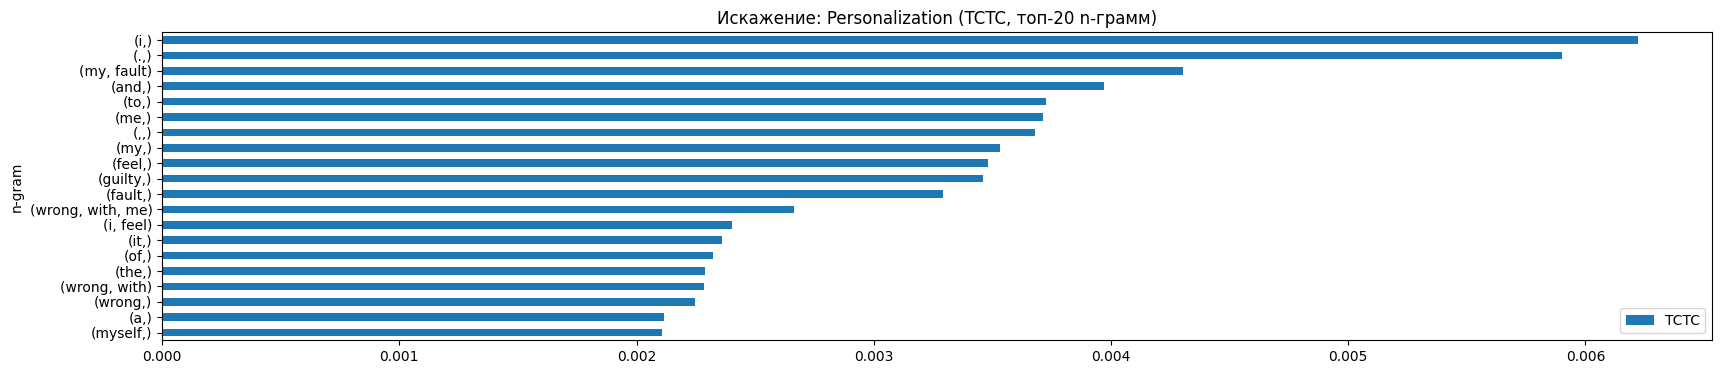

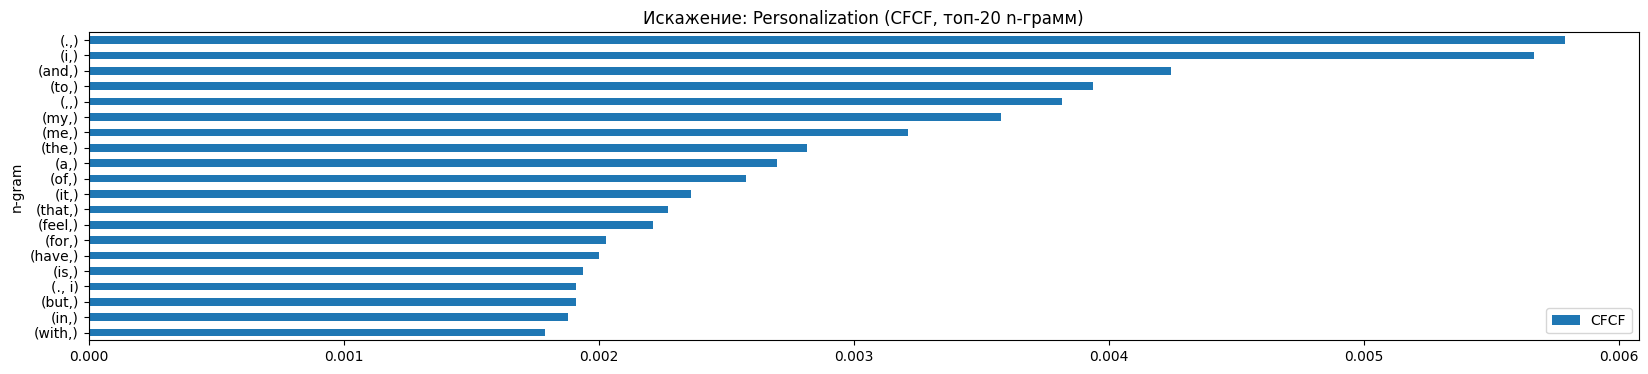

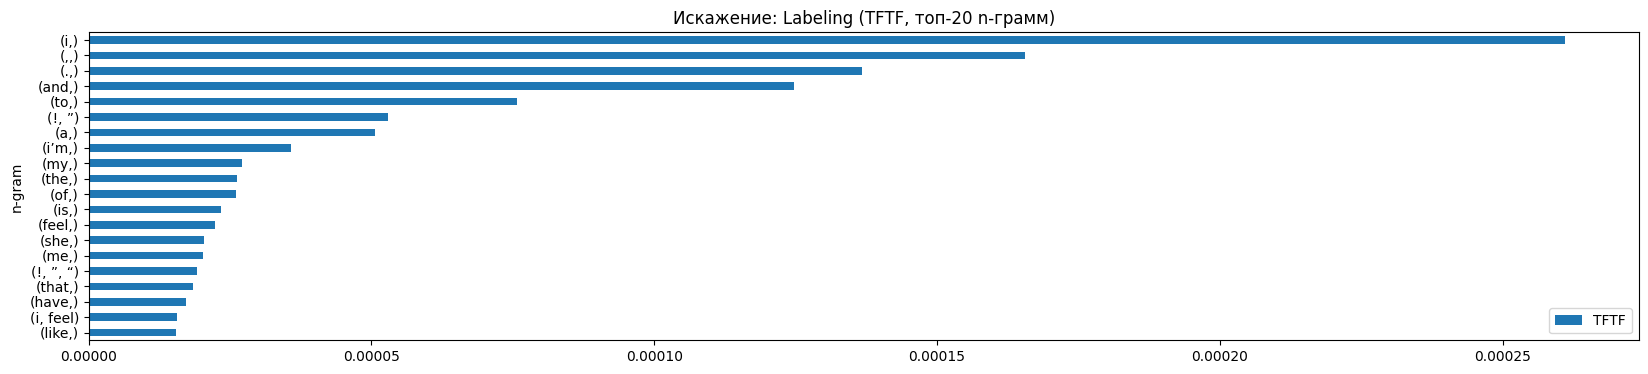

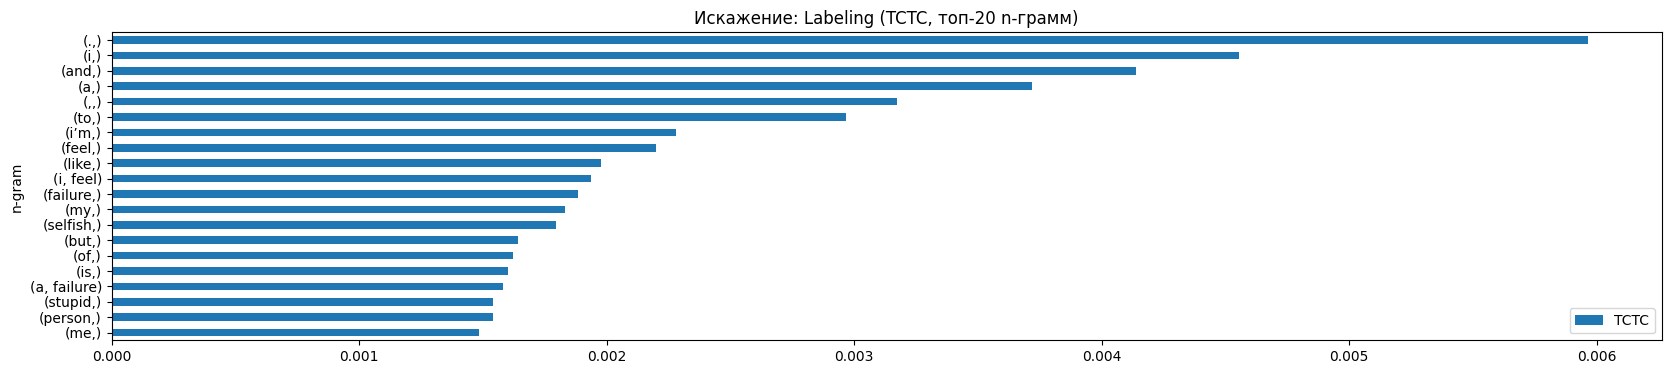

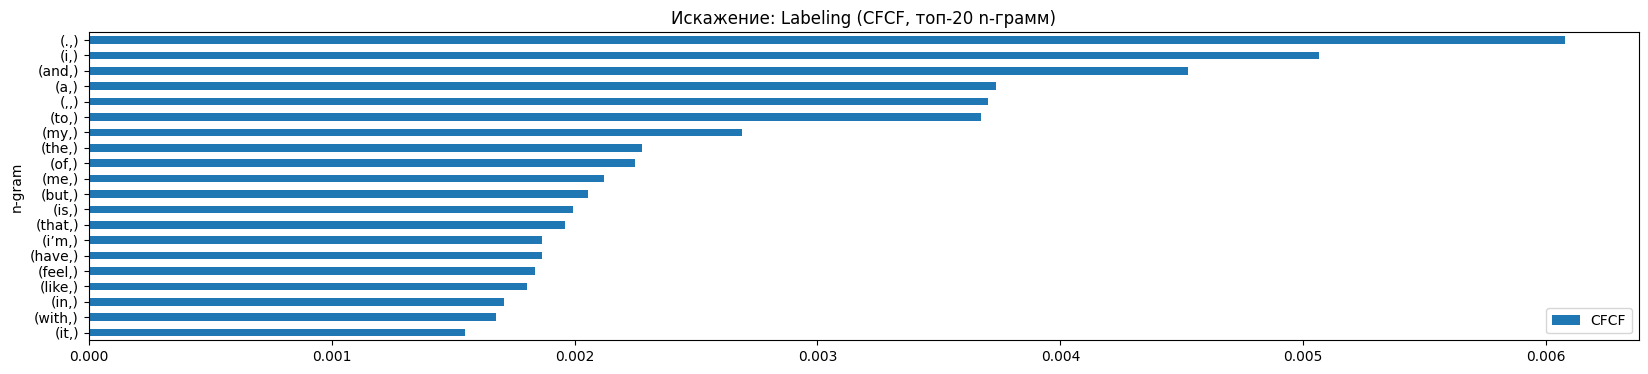

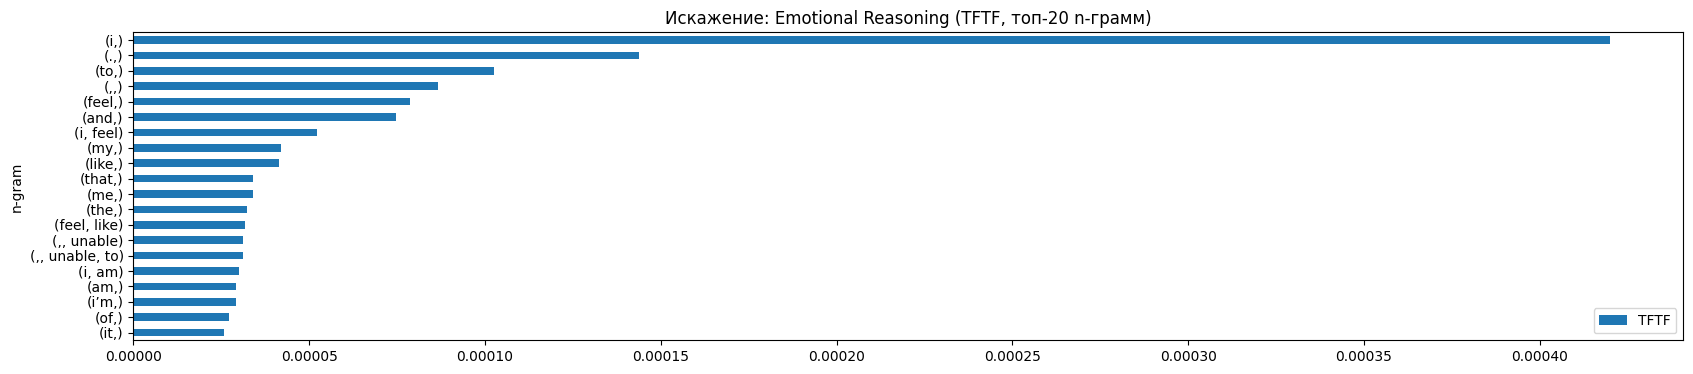

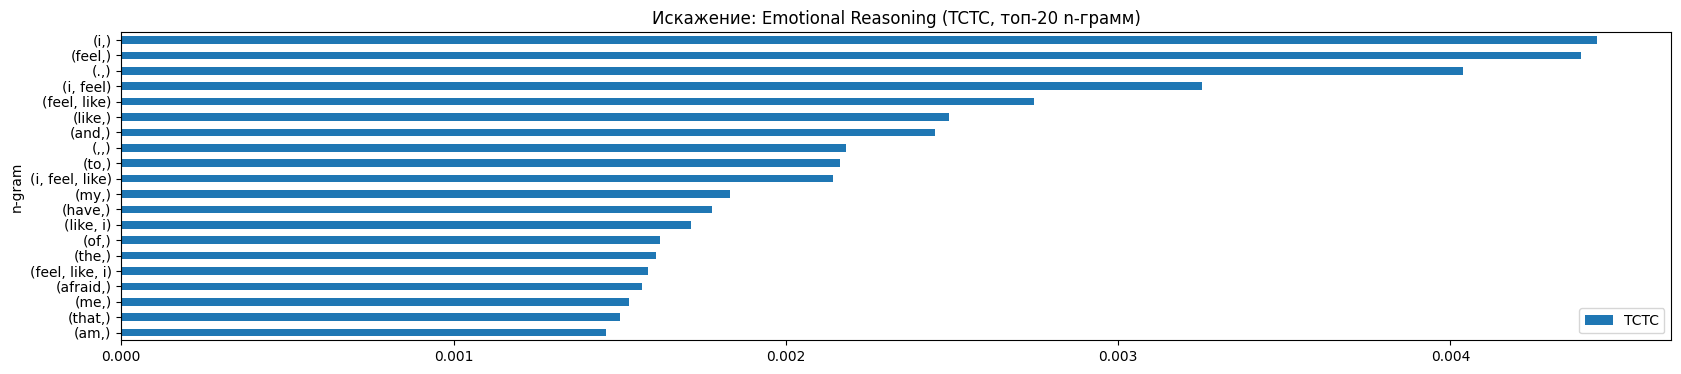

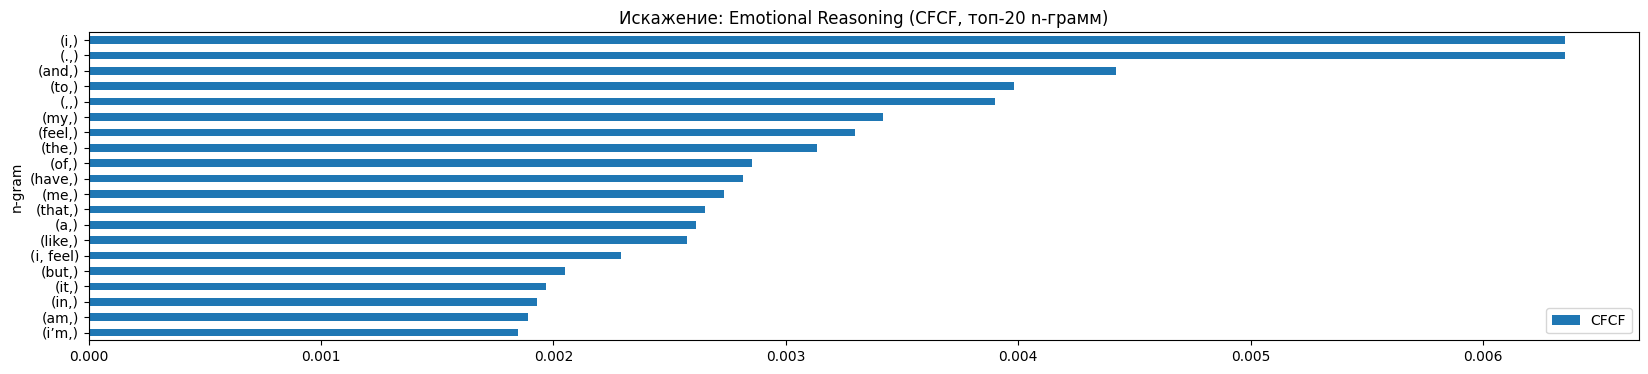

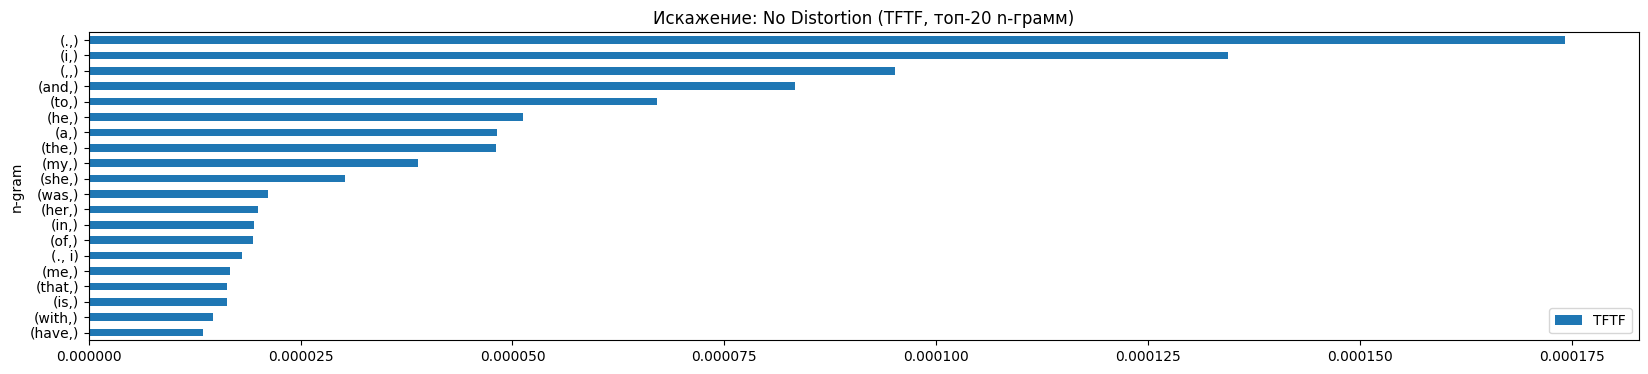

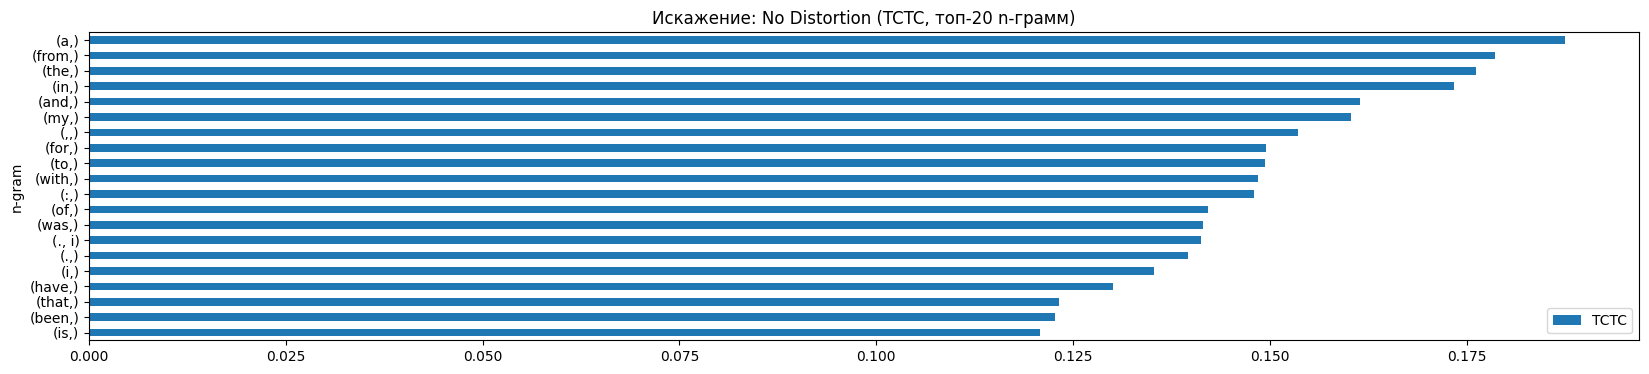

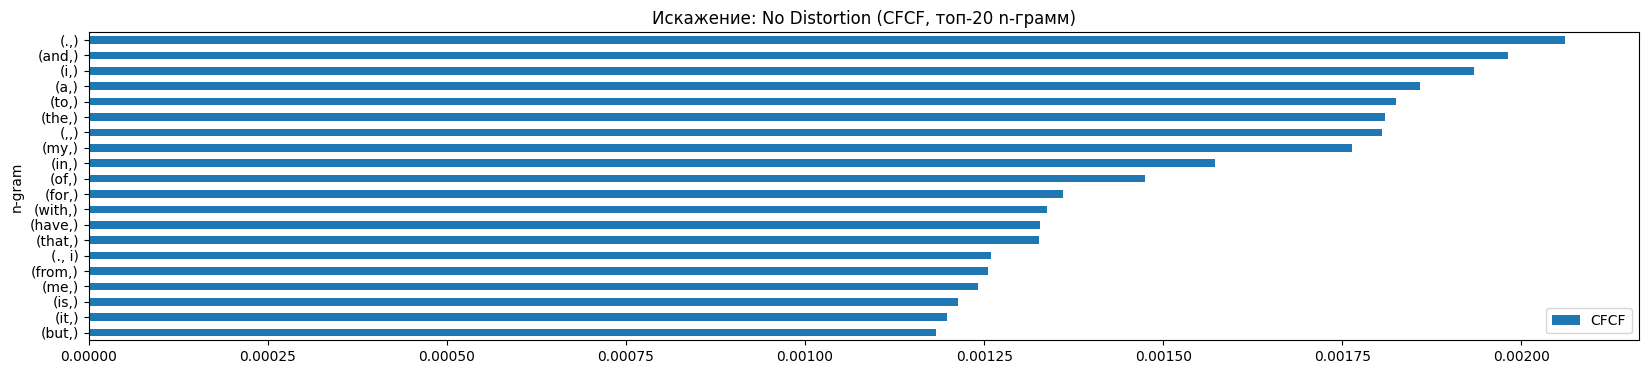

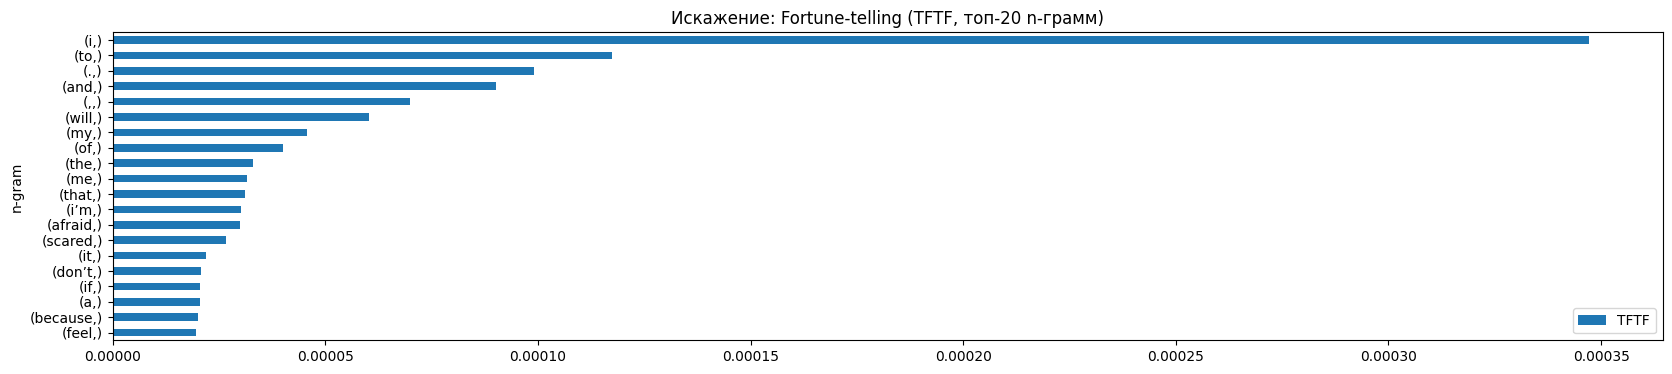

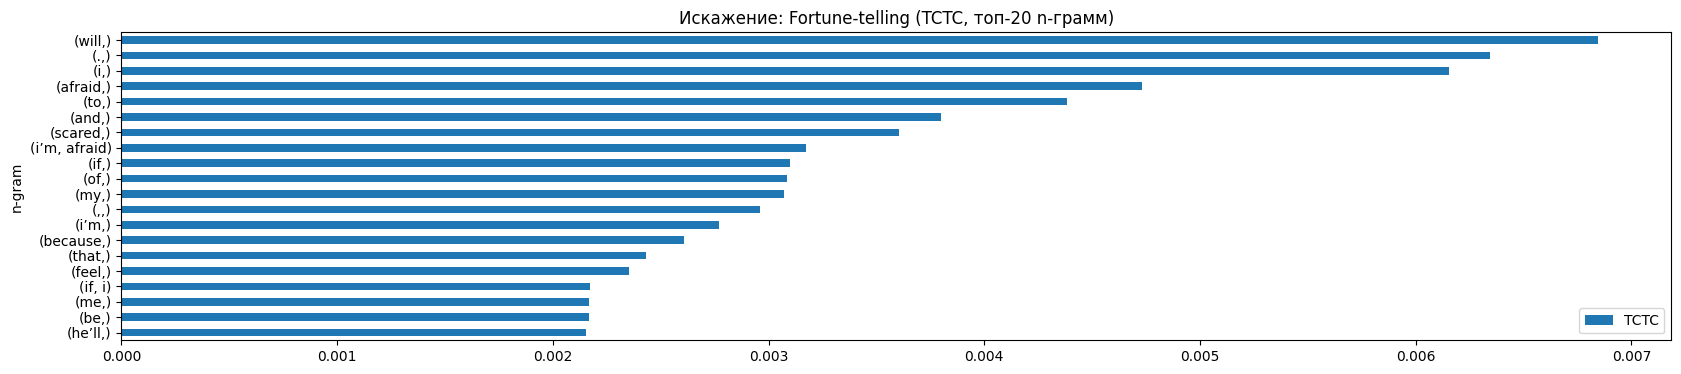

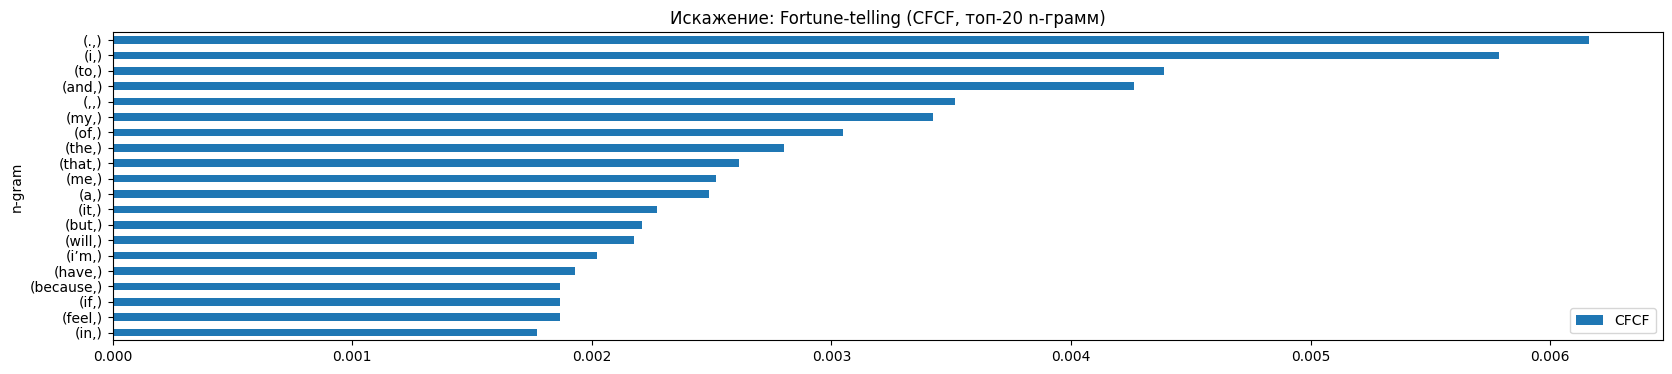

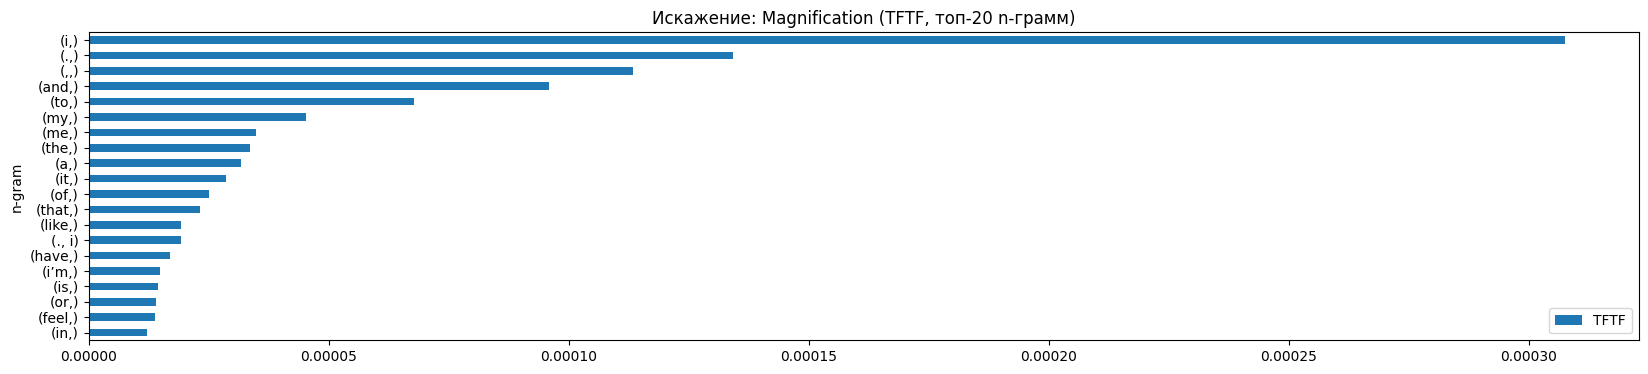

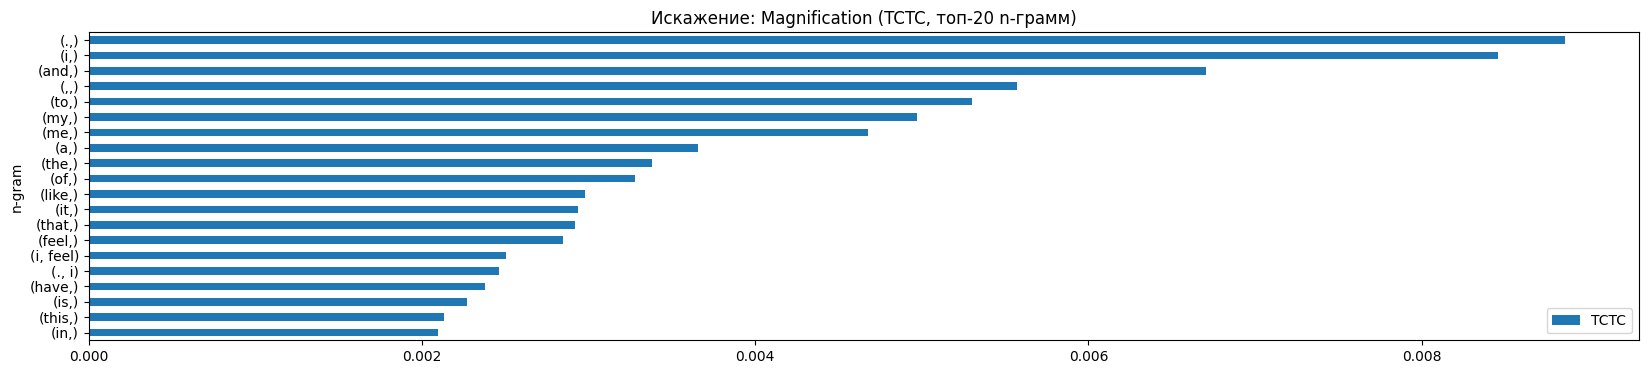

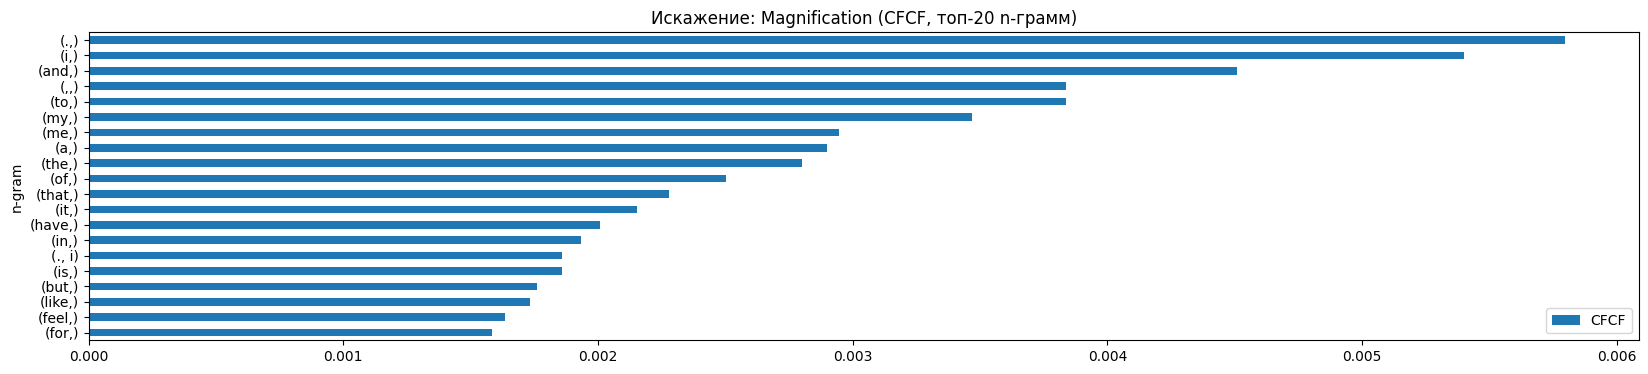

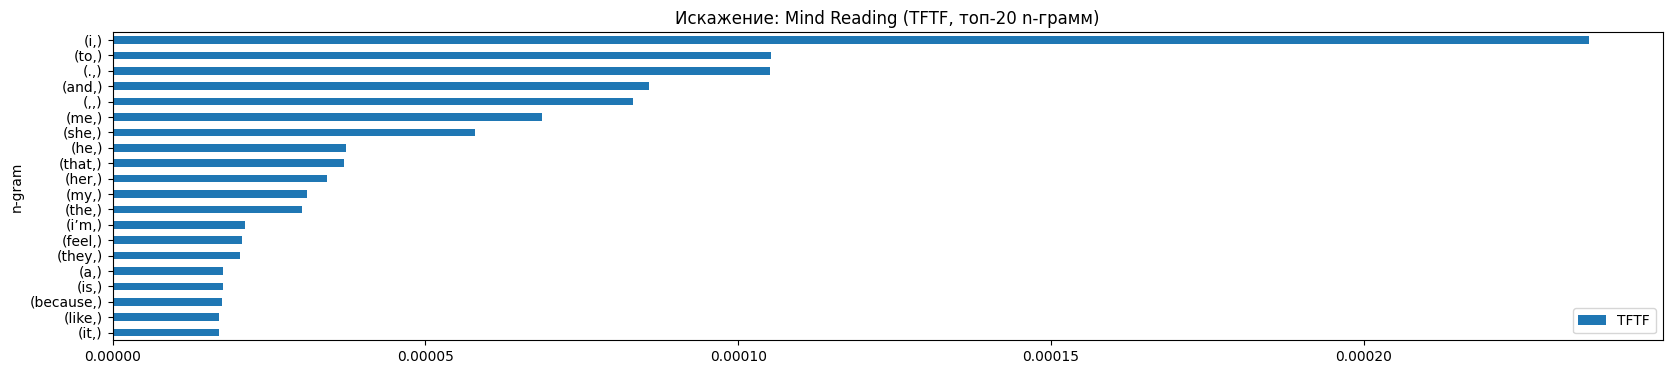

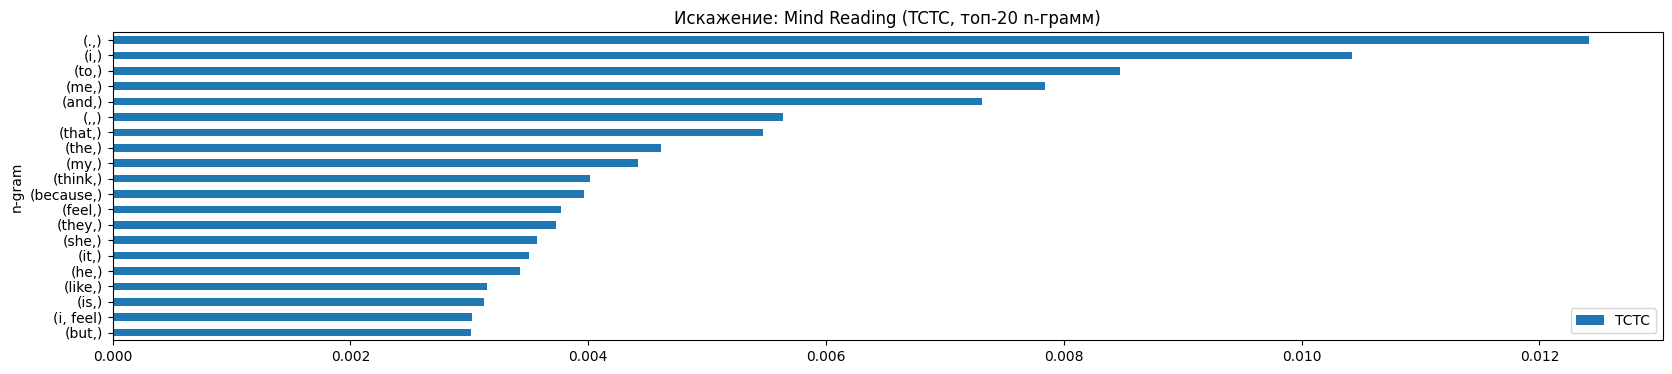

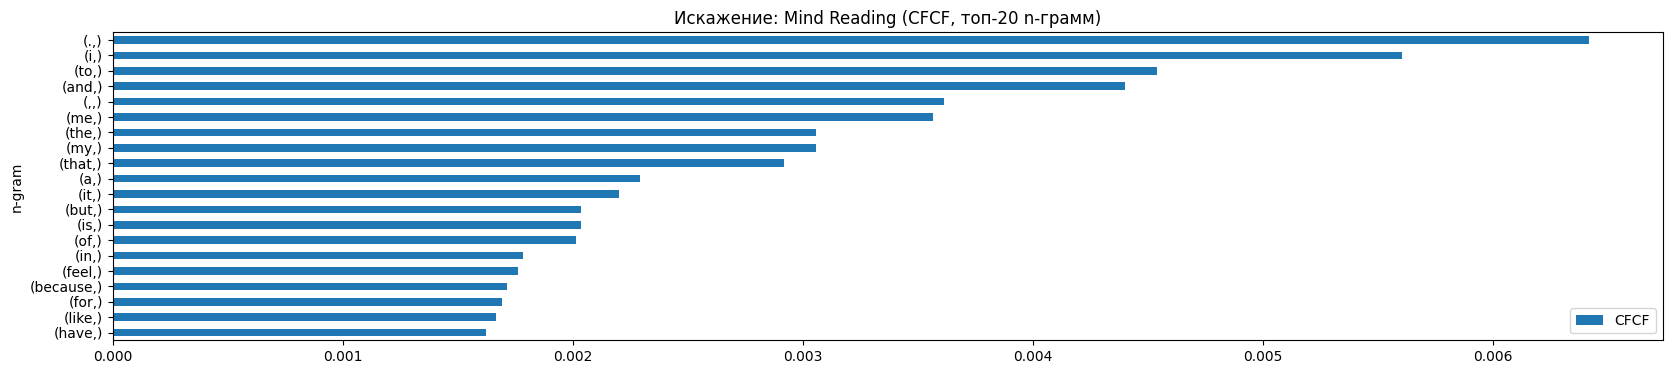

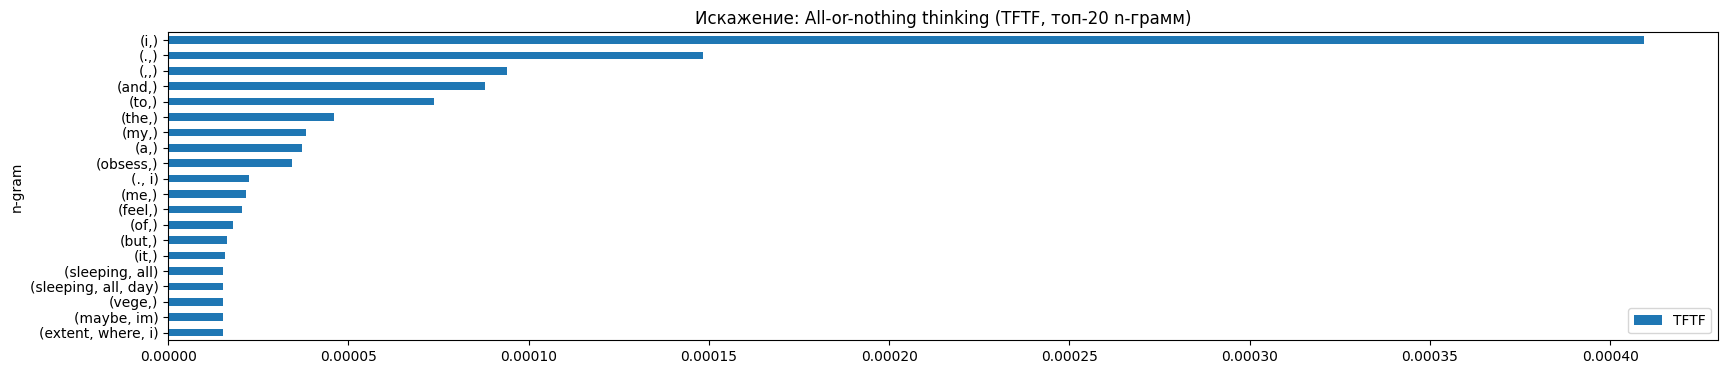

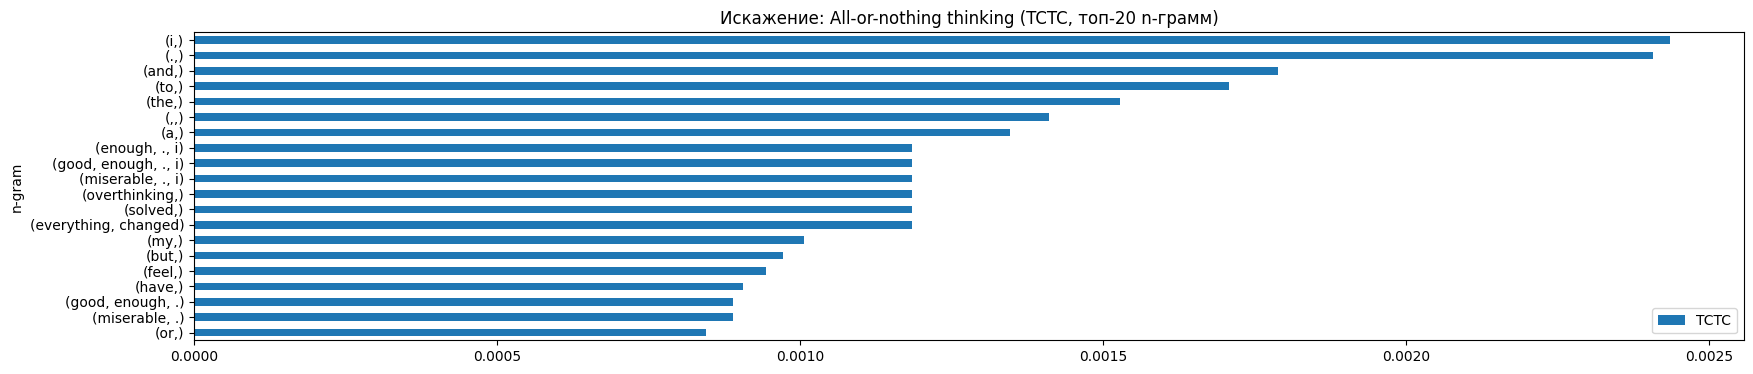

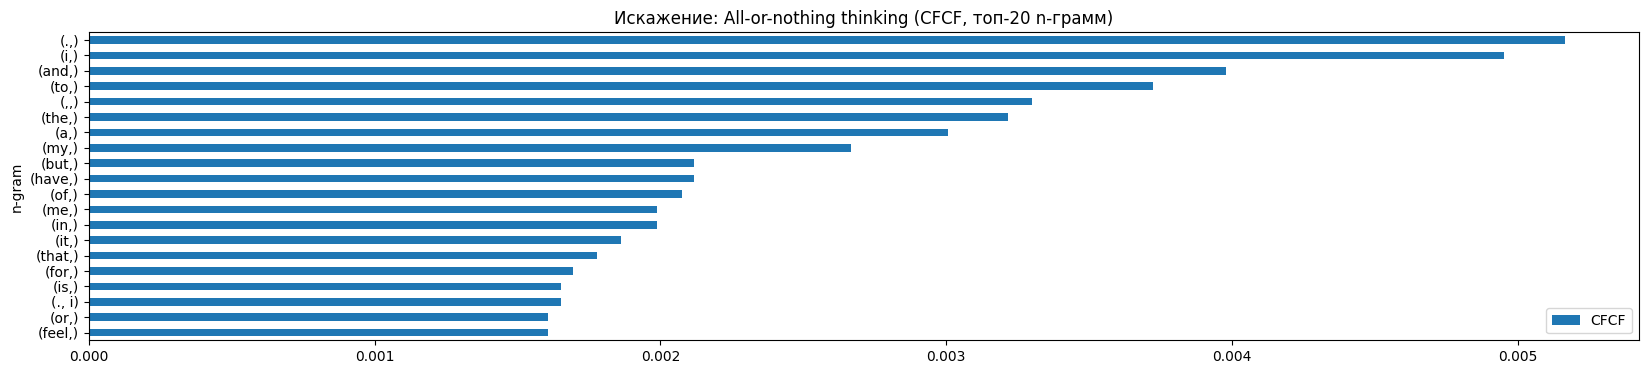

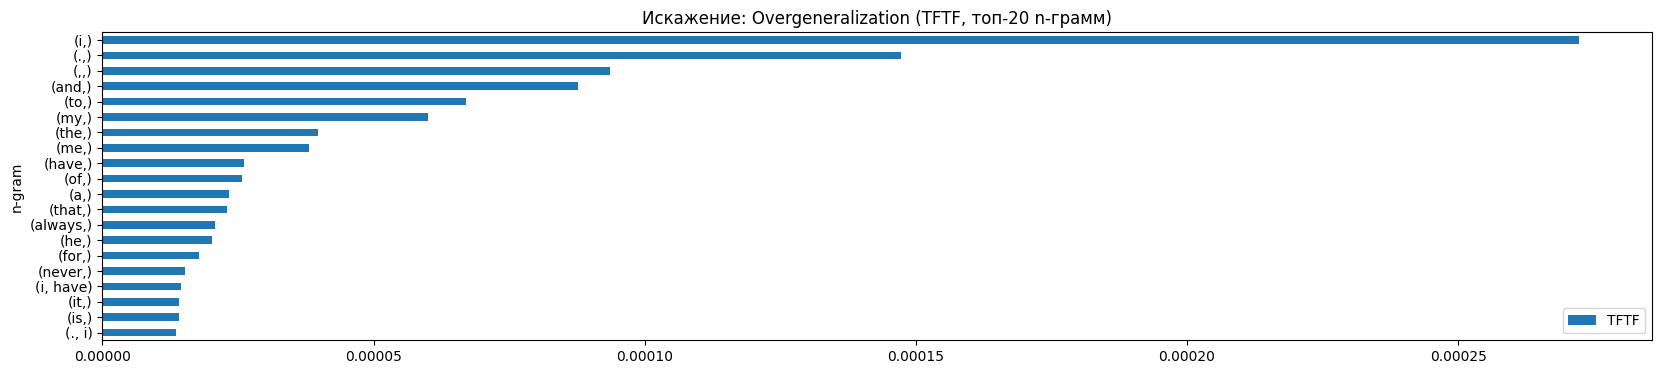

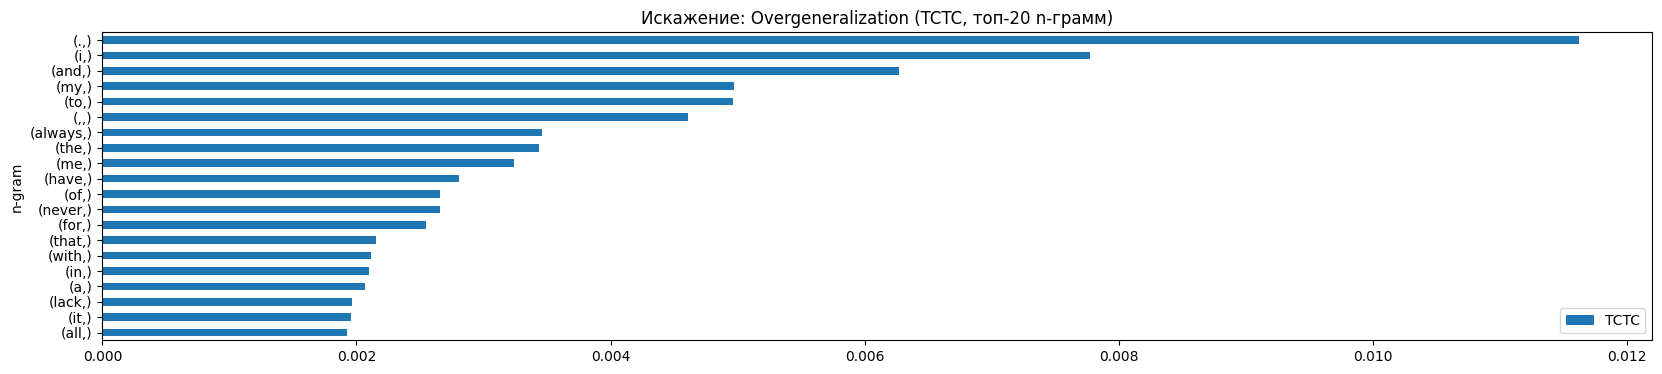

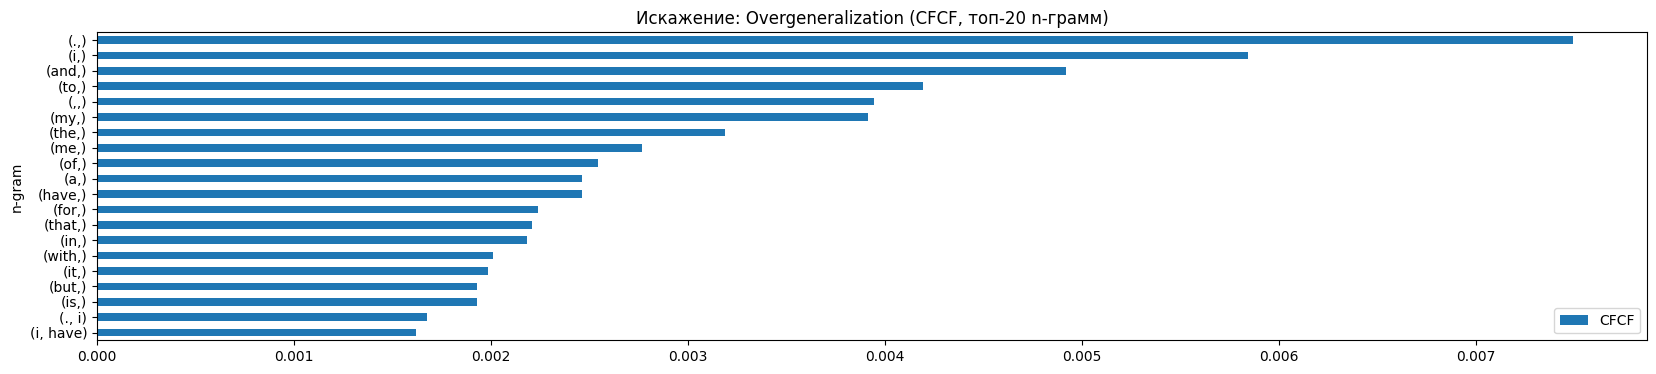

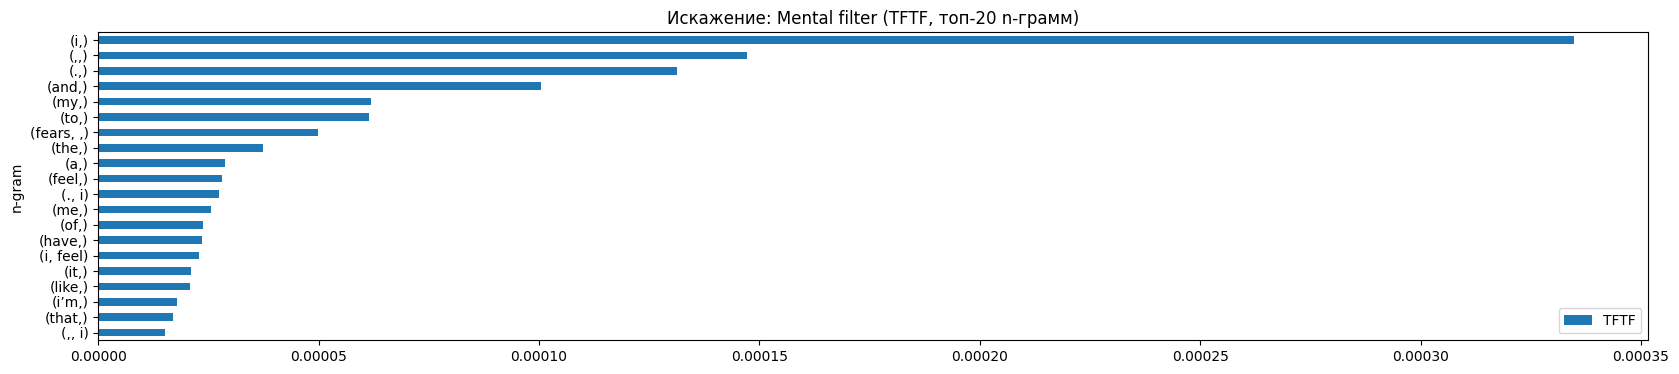

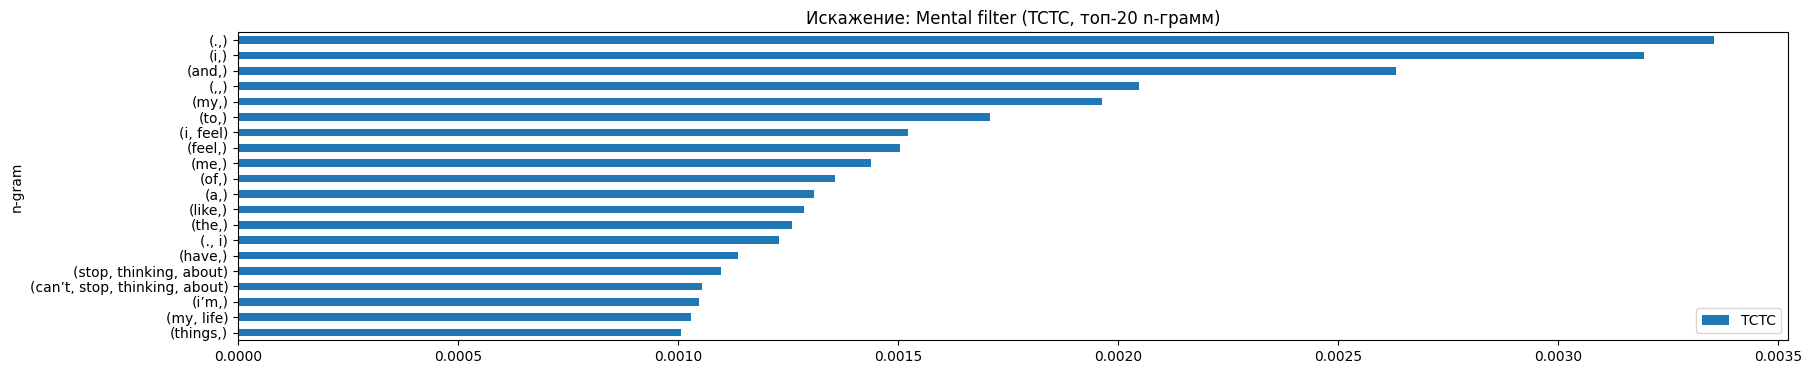

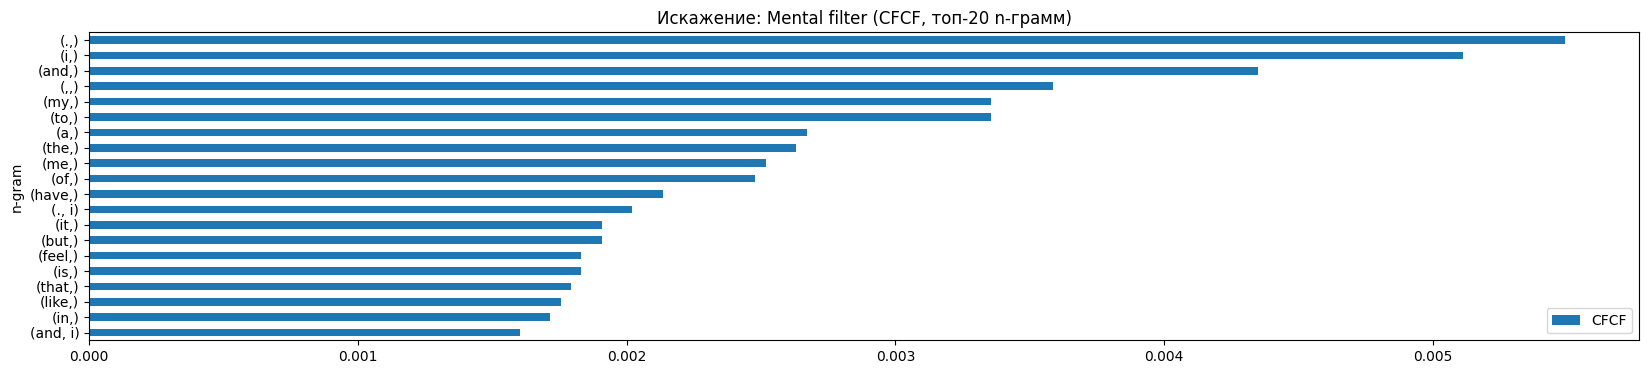

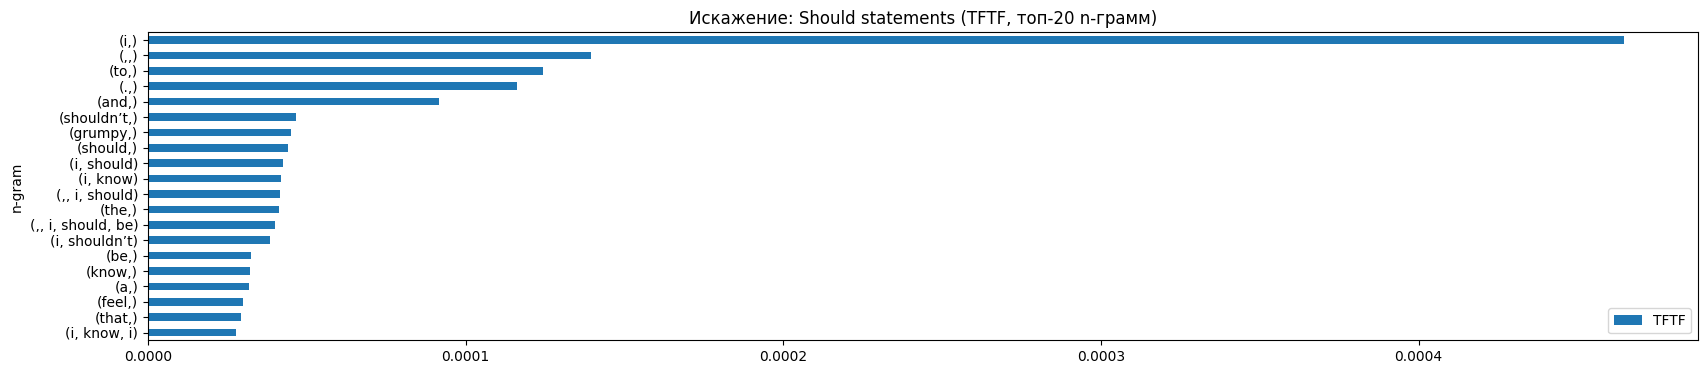

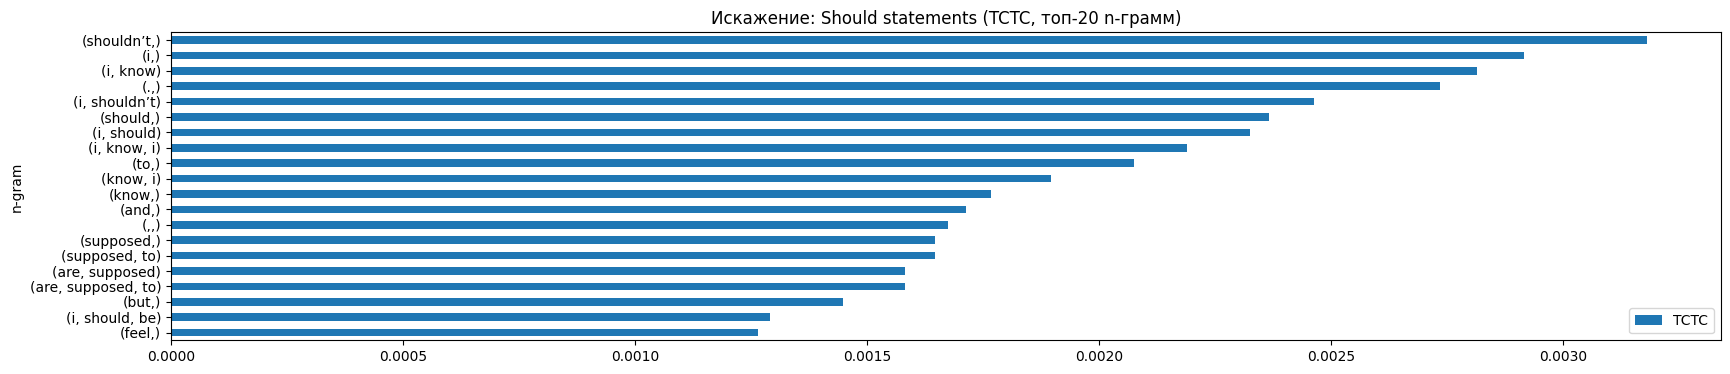

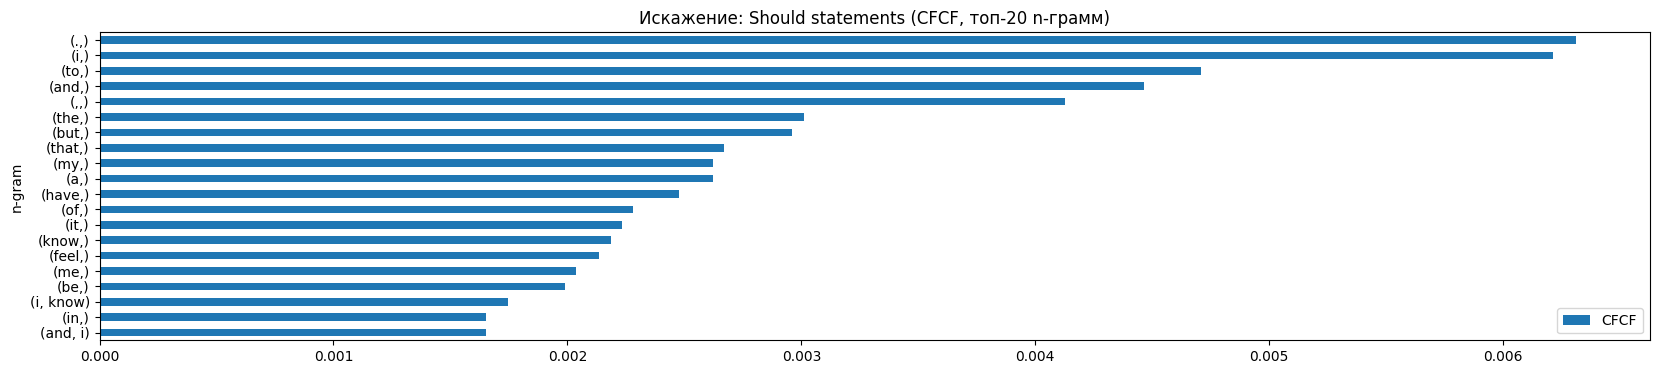

In [8]:
# We search TFTF_tf, TCTC_tc, CFCF_cf for n-grams for each cognitive distortion (see http://webstructor.net/papers/Kolonin-HP-ACA-IC-text.pdf)

# Dictionaries for metrics
n_gram_dicts = defaultdict(lambda: defaultdict(int))  # A dictionary for each distortion (distortion-n-gram-n_gram_frequency)
all_n_grams = defaultdict(int)  # A general dictionary for all n-grams
unique_n_gram_dicts = defaultdict(lambda: defaultdict(int))  # A dictionary for each distortion (distortion-unique_n-gram-n_gram_frequency)

# Counting documents for n-grams
doc_counts = defaultdict(int)  # The number of texts in which each n-gram appears

# The main loop through the rows of the DataFrame
for _, row in df.iterrows():
    # Text identification: first, check the 2nd column; if NaN, take the text from the 1st column
    text = row[1] if pd.notna(row[1]) else row[0] 
    primary_distortion = row[2]  # The primary cognitive distortion from the 3rd column
    secondary_distortion = row[3] if pd.notna(row[3]) else None  # The secondary distortion from the 4th column, if present

    # Text tokenization
    tokens = tokenize_re(text)

    # Look at unique n-grams and increment the document counters
    unique_ngrams = set()
    for n in range(1, 5):
        n_grams = build_ngrams(tokens, n)
        unique_ngrams.update(n_grams)
        dictcount(all_n_grams, n_grams)
        dictcount(n_gram_dicts[primary_distortion], n_grams)
        if secondary_distortion:
            dictcount(n_gram_dicts[secondary_distortion], n_grams)

    for n_gram in unique_ngrams:
        doc_counts[n_gram] += 1
        unique_n_gram_dicts[primary_distortion][n_gram] += 1
        if secondary_distortion:
            unique_n_gram_dicts[secondary_distortion][n_gram] += 1

# The total number of texts
total_docs = len(df)

# Calculation of the three metrics: TFTF_tf, TCTC_tc, CFCF_cf
metric_results = defaultdict(lambda: defaultdict(dict)) # (distortion-n-gram-calculated_three_metrics_for_it)
for distortion, ngram_dict in n_gram_dicts.items(): # For each distortion (distortion), examine the n-grams (ngram_dict)
    for n_gram, count in ngram_dict.items(): # For each n-gram (n_gram), check its frequency of occurrence (count) for the given distortion
        # TFTF: Mutual relevance of features and text (how important a given n-gram is for describing the text, looking for specific n-grams within the text)
        tf = count / sum(ngram_dict.values()) # Frequency of the n-gram in the text (TF): TF = (Number of times the given n-gram appears for the specific cognitive distortion) / (Number of times all other n-grams appear for the same cognitive distortion)
        ft = doc_counts[n_gram] / total_docs # The number of texts in which the current n-gram appears / the total number of texts in the dataset
        Ft = sum(ngram_dict.values())
        tftf = (tf ** 2) / (ft*Ft if ft*Ft > 0 else 1)

        # TCTC: Mutual relevance of categories and text (how the given n-gram is distributed across all texts of a given category)
        ct = unique_n_gram_dicts[distortion][n_gram] # The number of texts in which the current n-gram (n_gram) is associated with the current distortion (distortion)
        tctc = (ct ** 2) / (doc_counts[n_gram] * total_docs) # In the denominator: the number of texts containing the given n-gram, regardless of distortion * the total number of texts

        # CFCF: Mutual relevance of features and categories (how characteristic the given n-gram is for a particular category)
        cf = unique_n_gram_dicts[distortion][n_gram]
        fc = sum(unique_n_gram_dicts[distortion].values()) # The total number of texts for all n-grams associated with the given distortion
        cfcf = (cf ** 2) / (cf * fc if cf * fc > 0 else 1)

        # Save the results of the metrics
        metric_results[distortion][n_gram] = {
            "TFTF": tftf,
            "TCTC": tctc,
            "CFCF": cfcf
        }

# Visualization of metrics
for distortion, metrics in metric_results.items():
    tftf_sorted = {k: v["TFTF"] for k, v in sorted(metrics.items(), key=lambda item: item[1]["TFTF"], reverse=True)[:20]}
    tctc_sorted = {k: v["TCTC"] for k, v in sorted(metrics.items(), key=lambda item: item[1]["TCTC"], reverse=True)[:20]}
    cfcf_sorted = {k: v["CFCF"] for k, v in sorted(metrics.items(), key=lambda item: item[1]["CFCF"], reverse=True)[:20]}

    plot_dict(
        tftf_sorted,
        labels="n-gram",
        values="TFTF",
        title=f"Distortion: {distortion} (TFTF, top-20 n-grams)"
    )

    plot_dict(
        tctc_sorted,
        labels="n-gram",
        values="TCTC",
        title=f"Distortion: {distortion} (TCTC, top-20 n-grams)"
    )

    plot_dict(
        cfcf_sorted,
        labels="n-gram",
        values="CFCF",
        title=f"Distortion: {distortion} (CFCF, top-20 n-grams)"
    )
